In [1]:
#pip install seaborn
#pip install plotpy

In [2]:
import pandas as pd
import numpy as np
import os

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
path = './dataset/'
print(os.listdir(path))

['field-4.csv', 'field-1.csv', 'field-20.csv', 'field-16.csv', 'field-18.csv', 'test.csv', 'field-24.csv', 'field-7.csv', 'field-26.csv', 'field-6.csv', 'train.csv', 'field-11.csv', 'field-10.csv', 'field-25.csv', 'field-22.csv', 'field-23.csv', 'field-3.csv', 'field-0.csv', 'field-14.csv', 'sample-submission.csv', 'field-21.csv', 'field-2.csv', 'field-5.csv', 'field-15.csv', 'soil_data.csv', 'field-12.csv', 'field-27.csv', 'field-9.csv', 'field-13.csv', 'field-8.csv', 'field-17.csv', 'field-19.csv']


In [4]:
ds_train = pd.read_csv(path+'train.csv')
ds_test = pd.read_csv(path+'test.csv')
ds_all = pd.concat([ds_train, ds_test])

print(ds_train.shape, ds_test.shape, ds_all.shape)
ds_all.head()

(5243, 7) (4110, 6) (9353, 7)


,Id,field,age,type,harvest_year,harvest_month,production
0,0,0,19,5,2004,1,0.064071
1,1,0,19,5,2004,2,0.047658
2,2,0,19,5,2004,3,0.016866
3,3,0,19,5,2004,4,0.025525
4,4,0,19,5,2004,5,0.047690


In [5]:
def to_date(ds):
    return pd.to_datetime((ds.harvest_year*10000+ds.harvest_month*100+1)\
                                  .apply(str),format='%Y%m%d') 
for d in [ds_train, ds_test, ds_all]:
    d['date'] = to_date(d)


<Axes: xlabel='production', ylabel='Density'>

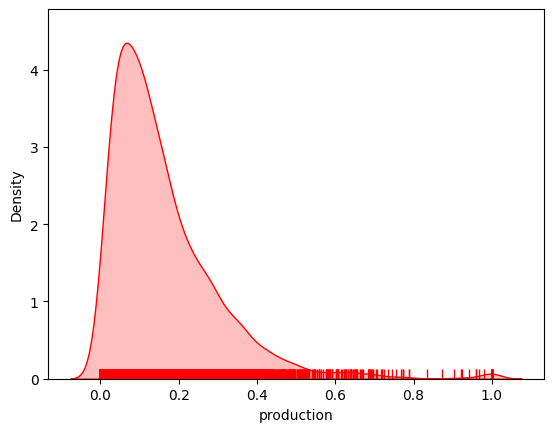

In [6]:
sns.distplot(ds_all.production, hist=False, color="r", rug=True, kde_kws={"shade": True})

In [7]:
print("Mean: ", ds_all.production.mean())

Mean:  0.16145932341328453


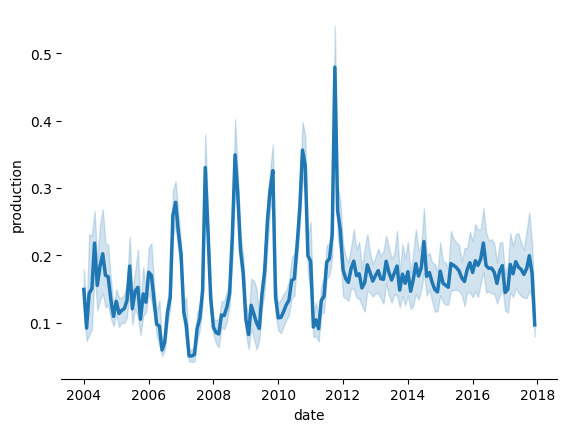

In [8]:
ax = plt.subplot(autoscale_on= True)
sns.lineplot(x='date', y='production', data=ds_all, palette="tab10", linewidth=2.5)

sns.despine(left=True)

In [9]:
ds_all.shape

(9353, 8)

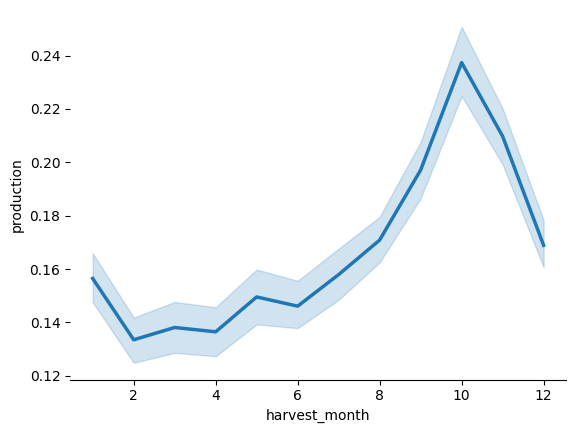

In [10]:
ax = plt.subplot(autoscale_on= True)
sns.lineplot(x='harvest_month', y='production', data=ds_all, palette="tab10", linewidth=2.5)

sns.despine(left=True)

<Axes: xlabel='type', ylabel='production'>

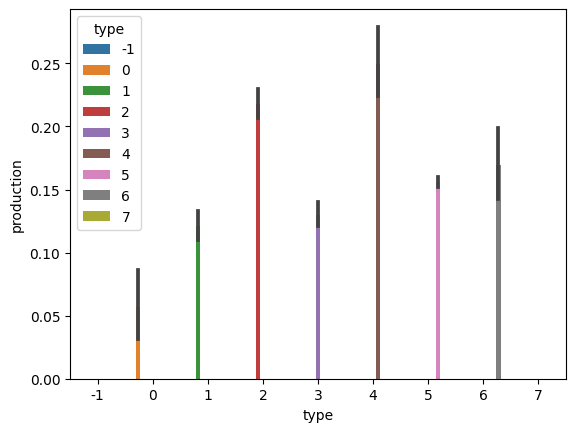

In [11]:
sns.barplot(x='type', y='production', hue='type', data=ds_all)

In [12]:
ds_train.head()

,Id,field,age,type,harvest_year,harvest_month,production,date
0,0,0,19,5,2004,1,0.064071,2004-01-01
1,1,0,19,5,2004,2,0.047658,2004-02-01
2,2,0,19,5,2004,3,0.016866,2004-03-01
3,3,0,19,5,2004,4,0.025525,2004-04-01
4,4,0,19,5,2004,5,0.047690,2004-05-01


In [13]:
x_train = ds_train.drop(columns=['production'], axis=1)
y_train = ds_train[['production']]

In [14]:
ds_test

,Id,field,age,type,harvest_year,harvest_month,date
0,5243,0,27,5,2012,1,2012-01-01
1,5244,0,27,5,2012,2,2012-02-01
2,5245,0,27,5,2012,3,2012-03-01
3,5246,0,27,5,2012,4,2012-04-01
4,5247,0,27,5,2012,5,2012-05-01
...,...,...,...,...,...,...,...
4105,9348,9,9,0,2017,7,2017-07-01
4106,9349,9,9,0,2017,8,2017-08-01
4107,9350,9,9,0,2017,9,2017-09-01
4108,9351,9,9,0,2017,10,2017-10-01


In [15]:
x_test = ds_test.drop(columns=['Id'], axis=1)

In [16]:
x_train

,Id,field,age,type,harvest_year,harvest_month,date
0,0,0,19,5,2004,1,2004-01-01
1,1,0,19,5,2004,2,2004-02-01
2,2,0,19,5,2004,3,2004-03-01
3,3,0,19,5,2004,4,2004-04-01
4,4,0,19,5,2004,5,2004-05-01
...,...,...,...,...,...,...,...
5238,5238,9,3,0,2011,8,2011-08-01
5239,5239,9,3,0,2011,9,2011-09-01
5240,5240,9,3,0,2011,10,2011-10-01
5241,5241,9,3,0,2011,11,2011-11-01


In [17]:
y_train

,production
0,0.064071
1,0.047658
2,0.016866
3,0.025525
4,0.047690
...,...
5238,0.042023
5239,0.067315
5240,0.072633
5241,0.217639


In [18]:
train = ds_train.copy()
train.columns

Index(['Id', 'field', 'age', 'type', 'harvest_year', 'harvest_month',
       'production', 'date'],
      dtype='object')

In [19]:
# train['date'] = train['date'].to_string()

In [20]:
train.head()

,Id,field,age,type,harvest_year,harvest_month,production,date
0,0,0,19,5,2004,1,0.064071,2004-01-01
1,1,0,19,5,2004,2,0.047658,2004-02-01
2,2,0,19,5,2004,3,0.016866,2004-03-01
3,3,0,19,5,2004,4,0.025525,2004-04-01
4,4,0,19,5,2004,5,0.047690,2004-05-01


In [21]:
train['day'] = train['date'].apply(lambda x: str(x).split('-')[2])
train['month'] = train['date'].apply(lambda x: str(x).split('-')[1])
train['year'] = train['date'].apply(lambda x: str(x).split('-')[0])

In [22]:
train.head()

,Id,field,age,type,harvest_year,harvest_month,production,date,day,month,year
0,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004
1,1,0,19,5,2004,2,0.047658,2004-02-01,01 00:00:00,02,2004
2,2,0,19,5,2004,3,0.016866,2004-03-01,01 00:00:00,03,2004
3,3,0,19,5,2004,4,0.025525,2004-04-01,01 00:00:00,04,2004
4,4,0,19,5,2004,5,0.047690,2004-05-01,01 00:00:00,05,2004


In [23]:
train['harvest_year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])

In [24]:
train['type'].unique()

array([5, 6, 2, 1, 4, 3, 0])

In [25]:
names = ['field', 'age', 'type', 'harvest_year', 'harvest_month', 'production']

train2 = train[names]
inputs = train2.columns[0:]

In [26]:
train.describe()

,Id,field,age,type,harvest_year,harvest_month,production,date
count,5243.000000,5243.000000,5243.000000,5243.000000,5243.000000,5243.000000,5243.000000,5243
mean,2621.000000,10.453748,11.910929,4.620446,2007.644478,6.546634,0.161459,2008-02-08 15:22:00.389090048
min,0.000000,0.000000,3.000000,0.000000,2004.000000,1.000000,0.000000,2004-01-01 00:00:00
25%,1310.500000,4.000000,7.000000,5.000000,2006.000000,4.000000,0.064168,2006-03-01 00:00:00
50%,2621.000000,10.000000,10.000000,5.000000,2008.000000,7.000000,0.122880,2008-02-01 00:00:00
75%,3931.500000,16.000000,18.000000,5.000000,2010.000000,10.000000,0.217869,2010-02-01 00:00:00
max,5242.000000,27.000000,26.000000,6.000000,2011.000000,12.000000,1.000000,2011-12-01 00:00:00
std,1513.668061,7.725394,6.464020,0.991060,2.240641,3.463368,0.140394,NaN


In [27]:
train2.corr()['production'].abs().sort_values(ascending=False)[:].index

Index(['production', 'harvest_month', 'age', 'harvest_year', 'field', 'type'], dtype='object')

In [28]:
x = train['harvest_month']
y = train['production']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     505.2
Date:                Wed, 24 May 2023   Prob (F-statistic):          6.99e-107
Time:                        14:32:58   Log-Likelihood:                 3095.8
No. Observations:                5243   AIC:                            -6188.
Df Residuals:                    5241   BIC:                            -6175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0828      0.004     20.900      0.000       0.075       0.091
harvest_month     0.0120      0.001     22.476      0.000       0.011       0.013
==============================================================================
Omnibus:                     2565.027   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20454.030
Skew:                           2.192   Prob(JB):                         0.00
Kurtosis:                      11.626   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x = train[['harvest_month', 'age']]
y = train['production']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     432.6
Date:                Wed, 24 May 2023   Prob (F-statistic):          1.33e-174
Time:                        14:32:58   Log-Likelihood:                 3255.2
No. Observations:                5243   AIC:                            -6504.
Df Residuals:                    5240   BIC:                            -6485.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0213      0.005      4.150      0.000       0.011       0.031
harvest_month     0.0122      0.001     23.596      0.000       0.011       0.013
age               0.0050      0.000     18.122      0.000       0.004       0.006
==============================================================================
Omnibus:                     2652.158   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24133.364
Skew:                           2.235   Prob(JB):                         0.00
Kurtosis:                      12.512   Cond. No.                         42.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
x = train[['harvest_month', 'age', 'harvest_year']]
y = train['production']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     302.8
Date:                Wed, 24 May 2023   Prob (F-statistic):          2.79e-181
Time:                        14:32:58   Log-Likelihood:                 3273.8
No. Observations:                5243   AIC:                            -6540.
Df Residuals:                    5239   BIC:                            -6513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.2279      1.679     -6.090      0.000     -13.520      -6.936
harvest_month     0.0123      0.001     23.802      0.000       0.011       0.013
age               0.0045      0.000     15.563      0.000       0.004       0.005
harvest_year      0.0051      0.001      6.103      0.000       0.003       0.007
==============================================================================
Omnibus:                     2666.859   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24617.908
Skew:                           2.246   Prob(JB):                         0.00
Kurtosis:                      12.618   Cond. No.                     1.88e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
x = train[['harvest_month', 'age', 'harvest_year', 'field']]
y = train['production']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     242.8
Date:                Wed, 24 May 2023   Prob (F-statistic):          1.33e-191
Time:                        14:32:58   Log-Likelihood:                 3300.6
No. Observations:                5243   AIC:                            -6591.
Df Residuals:                    5238   BIC:                            -6558.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.0243      1.679     -5.375      0.000     -12.316      -5.733
harvest_month     0.0123      0.001     23.915      0.000       0.011       0.013
age               0.0050      0.000     16.902      0.000       0.004       0.006
harvest_year      0.0045      0.001      5.372      0.000       0.003       0.006
field             0.0017      0.000      7.335      0.000       0.001       0.002
==============================================================================
Omnibus:                     2646.457   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24003.062
Skew:                           2.230   Prob(JB):                         0.00
Kurtosis:                      12.486   Cond. No.                     1.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
x = train[['harvest_month', 'age', 'harvest_year', 'field', 'type']]
y = train['production']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 24 May 2023   Prob (F-statistic):          5.20e-198
Time:                        14:32:58   Log-Likelihood:                 3318.2
No. Observations:                5243   AIC:                            -6624.
Df Residuals:                    5237   BIC:                            -6585.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.4808      1.676     -5.060      0.000     -11.767      -5.195
harvest_month     0.0123      0.001     23.978      0.000       0.011       0.013
age               0.0052      0.000     17.531      0.000       0.005       0.006
harvest_year      0.0042      0.001      5.086      0.000       0.003       0.006
field             0.0022      0.000      8.816      0.000       0.002       0.003
type             -0.0112      0.002     -5.946      0.000      -0.015      -0.008
==============================================================================
Omnibus:                     2655.024   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24294.878
Skew:                           2.236   Prob(JB):                         0.00
Kurtosis:                      12.550   Cond. No.                     1.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Rodando Sem Constante

In [33]:
x = train['harvest_month']
y = train['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.575
Model:                            OLS   Adj. R-squared (uncentered):              0.575
Method:                 Least Squares   F-statistic:                              7081.
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:32:58   Log-Likelihood:                          2886.0
No. Observations:                5243   AIC:                                     -5770.
Df Residuals:                    5242   BIC:                                     -5763.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0219      0.000     84.149      0.000       0.021       0.022
==============================================================================
Omnibus:                     2173.179   Durbin-Watson:                   1.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15390.464
Skew:                           1.824   Prob(JB):                         0.00
Kurtosis:                      10.559   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
x = train[['harvest_month', 'age']]
y = train['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.629
Model:                            OLS   Adj. R-squared (uncentered):              0.629
Method:                 Least Squares   F-statistic:                              4448.
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:32:58   Log-Likelihood:                          3246.6
No. Observations:                5243   AIC:                                     -6489.
Df Residuals:                    5241   BIC:                                     -6476.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0137      0.000     35.887      0.000       0.013       0.014
age               0.0058      0.000     27.801      0.000       0.005       0.006
==============================================================================
Omnibus:                     2599.219   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23630.620
Skew:                           2.178   Prob(JB):                         0.00
Kurtosis:                      12.444   Cond. No.                         3.45
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
x = train[['harvest_month', 'age', 'harvest_year']]
y = train['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.631
Model:                            OLS   Adj. R-squared (uncentered):              0.630
Method:                 Least Squares   F-statistic:                              2981.
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:32:58   Log-Likelihood:                          3255.3
No. Observations:                5243   AIC:                                     -6505.
Df Residuals:                    5240   BIC:                                     -6485.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0122      0.001     23.586      0.000       0.011       0.013
age               0.0050      0.000     18.095      0.000       0.004       0.006
harvest_year   1.065e-05   2.55e-06      4.169      0.000    5.64e-06    1.57e-05
==============================================================================
Omnibus:                     2652.433   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24136.857
Skew:                           2.236   Prob(JB):                         0.00
Kurtosis:                      12.513   Cond. No.                         580.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
x = train[['harvest_month', 'age', 'harvest_year', 'field']]
y = train['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.635
Model:                            OLS   Adj. R-squared (uncentered):              0.635
Method:                 Least Squares   F-statistic:                              2277.
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:32:58   Log-Likelihood:                          3286.1
No. Observations:                5243   AIC:                                     -6564.
Df Residuals:                    5239   BIC:                                     -6538.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0122      0.001     23.734      0.000       0.011       0.013
age               0.0055      0.000     19.446      0.000       0.005       0.006
harvest_year  -1.835e-06   2.99e-06     -0.613      0.540    -7.7e-06    4.03e-06
field             0.0019      0.000      7.877      0.000       0.001       0.002
==============================================================================
Omnibus:                     2632.125   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23538.171
Skew:                           2.220   Prob(JB):                         0.00
Kurtosis:                      12.382   Cond. No.                         580.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
x = train[['harvest_month', 'age', 'harvest_year', 'field', 'type']]
y = train['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.638
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                              1842.
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:32:59   Log-Likelihood:                          3305.4
No. Observations:                5243   AIC:                                     -6601.
Df Residuals:                    5238   BIC:                                     -6568.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0122      0.001     23.810      0.000       0.011       0.013
age               0.0057      0.000     20.055      0.000       0.005       0.006
harvest_year   2.165e-05   4.81e-06      4.498      0.000    1.22e-05    3.11e-05
field             0.0023      0.000      9.404      0.000       0.002       0.003
type             -0.0117      0.002     -6.217      0.000      -0.015      -0.008
==============================================================================
Omnibus:                     2644.368   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23901.814
Skew:                           2.229   Prob(JB):                         0.00
Kurtosis:                      12.462   Cond. No.                     2.13e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MT

In [38]:
train.head()

,Id,field,age,type,harvest_year,harvest_month,production,date,day,month,year
0,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004
1,1,0,19,5,2004,2,0.047658,2004-02-01,01 00:00:00,02,2004
2,2,0,19,5,2004,3,0.016866,2004-03-01,01 00:00:00,03,2004
3,3,0,19,5,2004,4,0.025525,2004-04-01,01 00:00:00,04,2004
4,4,0,19,5,2004,5,0.047690,2004-05-01,01 00:00:00,05,2004


In [39]:
field_0_df = pd.read_csv('dataset/field-0.csv')
field_1_df = pd.read_csv('dataset/field-1.csv')
field_2_df = pd.read_csv('dataset/field-2.csv')
field_3_df = pd.read_csv('dataset/field-3.csv')
field_4_df = pd.read_csv('dataset/field-4.csv')
field_5_df = pd.read_csv('dataset/field-5.csv')
field_6_df = pd.read_csv('dataset/field-6.csv')
field_7_df = pd.read_csv('dataset/field-7.csv')
field_8_df = pd.read_csv('dataset/field-8.csv')
field_9_df = pd.read_csv('dataset/field-9.csv')
field_10_df = pd.read_csv('dataset/field-10.csv')
field_11_df = pd.read_csv('dataset/field-11.csv')
field_12_df = pd.read_csv('dataset/field-12.csv')
field_13_df = pd.read_csv('dataset/field-13.csv')
field_14_df = pd.read_csv('dataset/field-14.csv')
field_15_df = pd.read_csv('dataset/field-15.csv')
field_16_df = pd.read_csv('dataset/field-16.csv')
field_17_df = pd.read_csv('dataset/field-17.csv')
field_18_df = pd.read_csv('dataset/field-18.csv')
field_19_df = pd.read_csv('dataset/field-19.csv')
field_20_df = pd.read_csv('dataset/field-20.csv')
field_21_df = pd.read_csv('dataset/field-21.csv')
field_22_df = pd.read_csv('dataset/field-22.csv')
field_23_df = pd.read_csv('dataset/field-23.csv')
field_24_df = pd.read_csv('dataset/field-24.csv')
field_25_df = pd.read_csv('dataset/field-25.csv')
field_26_df = pd.read_csv('dataset/field-26.csv')
field_27_df = pd.read_csv('dataset/field-27.csv')
soil_data_df = pd.read_csv('dataset/soil_data.csv')
pd.set_option('display.max_columns', None)

In [40]:
field_0_df.head()

,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation
0,1,2002,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55
1,2,2002,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,289.28
2,3,2002,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,492.05
3,4,2002,25.890,24.904,1.4950,0.36013,0.35991,0.35997,0.36043,461.84
4,5,2002,26.182,24.826,1.8062,0.35567,0.35541,0.35536,0.35894,282.69


In [41]:
soil_data_df.head()

,field,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,4,200,7,6973,1345,1308,1361,1413,1486,1503,1513,15,15,12,10,8,8,8,31,31,32,39,40,40,41,0,1,1,1,1,1,4,15,28,35,55,56,129,19,21,19,19,14,12,12,46,46,46,48,48,49,51,43,41,41,41,41,42,43,22,21,21,20,21,19,20,47,48,47,42,40,40,39
1,3,200,9,7272,1297,1287,1323,1428,1492,1508,1521,17,16,13,11,10,9,9,32,32,35,39,41,41,42,1,1,2,2,2,2,4,17,27,33,50,54,123,30,20,18,17,13,11,11,46,46,46,48,48,49,51,43,40,40,41,41,42,43,24,23,22,22,23,22,22,44,45,43,40,36,37,36
2,2,200,7,7281,1266,1249,1310,1387,1463,1491,1503,15,14,10,9,8,7,7,32,32,34,38,39,40,40,0,0,0,0,0,1,3,13,28,34,47,50,113,14,23,24,16,12,11,10,46,45,45,47,48,48,49,44,40,40,40,40,41,42,22,22,21,21,21,21,22,46,46,45,40,39,39,39
3,1,200,6,7457,1297,1277,1345,1409,1480,1506,1518,16,15,11,9,9,8,8,31,30,32,37,38,39,39,1,1,1,2,1,2,3,14,27,33,45,45,104,17,21,18,15,10,9,9,46,46,46,47,48,48,50,46,42,42,43,43,43,45,23,23,22,21,21,21,21,46,47,46,42,40,40,40
4,7,200,8,6771,1305,1289,1333,1438,1497,1510,1524,18,16,13,11,10,9,9,31,31,32,37,40,40,41,1,1,2,2,1,2,4,16,30,36,56,60,137,26,29,24,21,17,15,15,45,44,44,46,46,47,47,44,41,41,41,41,42,42,25,24,24,23,22,21,22,44,45,44,40,38,38,37


In [42]:
soil_data_col = soil_data_df.columns

In [43]:
for col in soil_data_df:
    field_0_df[col] = soil_data_df[soil_data_df['field'] == 0][col].values.item()
    field_1_df[col] = soil_data_df[soil_data_df['field'] == 1][col].values.item()
    field_2_df[col] = soil_data_df[soil_data_df['field'] == 2][col].values.item()
    field_3_df[col] = soil_data_df[soil_data_df['field'] == 3][col].values.item()
    field_4_df[col] = soil_data_df[soil_data_df['field'] == 4][col].values.item()
    field_5_df[col] = soil_data_df[soil_data_df['field'] == 5][col].values.item()
    field_6_df[col] = soil_data_df[soil_data_df['field'] == 6][col].values.item()
    field_7_df[col] = soil_data_df[soil_data_df['field'] == 7][col].values.item()
    field_8_df[col] = soil_data_df[soil_data_df['field'] == 8][col].values.item()
    field_9_df[col] = soil_data_df[soil_data_df['field'] == 9][col].values.item()
    field_10_df[col] = soil_data_df[soil_data_df['field'] == 10][col].values.item()
    field_11_df[col] = soil_data_df[soil_data_df['field'] == 11][col].values.item()
    field_12_df[col] = soil_data_df[soil_data_df['field'] == 12][col].values.item()
    field_13_df[col] = soil_data_df[soil_data_df['field'] == 13][col].values.item()
    field_14_df[col] = soil_data_df[soil_data_df['field'] == 14][col].values.item()
    field_15_df[col] = soil_data_df[soil_data_df['field'] == 15][col].values.item()
    field_16_df[col] = soil_data_df[soil_data_df['field'] == 16][col].values.item()
    field_17_df[col] = soil_data_df[soil_data_df['field'] == 17][col].values.item()
    field_18_df[col] = soil_data_df[soil_data_df['field'] == 18][col].values.item()
    field_19_df[col] = soil_data_df[soil_data_df['field'] == 19][col].values.item()
    field_20_df[col] = soil_data_df[soil_data_df['field'] == 20][col].values.item()
    field_21_df[col] = soil_data_df[soil_data_df['field'] == 21][col].values.item()
    field_22_df[col] = soil_data_df[soil_data_df['field'] == 22][col].values.item()
    field_23_df[col] = soil_data_df[soil_data_df['field'] == 23][col].values.item()
    field_24_df[col] = soil_data_df[soil_data_df['field'] == 24][col].values.item()
    field_25_df[col] = soil_data_df[soil_data_df['field'] == 25][col].values.item()
    field_26_df[col] = soil_data_df[soil_data_df['field'] == 26][col].values.item()
    field_27_df[col] = soil_data_df[soil_data_df['field'] == 27][col].values.item()

In [44]:
field_0_df.head()

,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation,field,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,1,2002,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
1,2,2002,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,289.28,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
2,3,2002,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,492.05,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
3,4,2002,25.890,24.904,1.4950,0.36013,0.35991,0.35997,0.36043,461.84,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
4,5,2002,26.182,24.826,1.8062,0.35567,0.35541,0.35536,0.35894,282.69,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36


In [45]:
full_data = pd.concat([field_0_df, field_1_df, field_2_df, field_3_df, field_4_df, field_5_df, field_6_df, field_7_df, field_8_df, field_9_df, field_10_df, field_11_df, field_12_df, field_13_df, field_14_df, field_15_df, field_16_df, field_17_df, field_18_df, field_19_df, field_20_df, field_21_df, field_22_df, field_23_df, field_24_df, field_25_df, field_26_df, field_27_df])

In [46]:
data_test = {'month': [0], 'year': [0], 'temperature': [0], 'dewpoint': [0], 'windspeed': [0], 'Soilwater_L1': [0],
       'Soilwater_L2': [0], 'Soilwater_L3': [0], 'Soilwater_L4': [0], 'Precipitation': [0],
       'field': [0], 'BDRICM_BDRICM_M': [0], 'BDRLOG_BDRLOG_M': [0], 'BDTICM_BDTICM_M': [0],
       'BLDFIE_sl1': [0], 'BLDFIE_sl2': [0], 'BLDFIE_sl3': [0], 'BLDFIE_sl4': [0], 'BLDFIE_sl5': [0],
       'BLDFIE_sl6': [0], 'BLDFIE_sl7': [0], 'CECSOL_sl1': [0], 'CECSOL_sl2': [0], 'CECSOL_sl3': [0],
       'CECSOL_sl4': [0], 'CECSOL_sl5': [0], 'CECSOL_sl6': [0], 'CECSOL_sl7': [0], 'CLYPPT_sl1': [0],
       'CLYPPT_sl2': [0], 'CLYPPT_sl3': [0], 'CLYPPT_sl4': [0], 'CLYPPT_sl5': [0], 'CLYPPT_sl6': [0],
       'CLYPPT_sl7': [0], 'CRFVOL_sl1': [0], 'CRFVOL_sl2': [0], 'CRFVOL_sl3': [0], 'CRFVOL_sl4': [0],
       'CRFVOL_sl5': [0], 'CRFVOL_sl6': [0], 'CRFVOL_sl7': [0], 'OCSTHA_sd1': [0], 'OCSTHA_sd2': [0],
       'OCSTHA_sd3': [0], 'OCSTHA_sd4': [0], 'OCSTHA_sd5': [0], 'OCSTHA_sd6': [0], 'ORCDRC_sl1': [0],
       'ORCDRC_sl2': [0], 'ORCDRC_sl3': [0], 'ORCDRC_sl4': [0], 'ORCDRC_sl5': [0], 'ORCDRC_sl6': [0],
       'ORCDRC_sl7': [0], 'PHIHOX_sl1': [0], 'PHIHOX_sl2': [0], 'PHIHOX_sl3': [0], 'PHIHOX_sl4': [0],
       'PHIHOX_sl5': [0], 'PHIHOX_sl6': [0], 'PHIHOX_sl7': [0], 'PHIKCL_sl1': [0], 'PHIKCL_sl2': [0],
       'PHIKCL_sl3': [0], 'PHIKCL_sl4': [0], 'PHIKCL_sl5': [0], 'PHIKCL_sl6': [0], 'PHIKCL_sl7': [0],
       'SLTPPT_sl1': [0], 'SLTPPT_sl2': [0], 'SLTPPT_sl3': [0], 'SLTPPT_sl4': [0], 'SLTPPT_sl5': [0],
       'SLTPPT_sl6': [0], 'SLTPPT_sl7': [0], 'SNDPPT_sl1': [0], 'SNDPPT_sl2': [0], 'SNDPPT_sl3': [0],
       'SNDPPT_sl4': [0], 'SNDPPT_sl5': [0], 'SNDPPT_sl6': [0], 'SNDPPT_sl7': [0]}

In [47]:
full_data_test = full_data.copy()

In [48]:
full_data.head()

,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation,field,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,1,2002,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
1,2,2002,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,289.28,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
2,3,2002,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,492.05,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
3,4,2002,25.890,24.904,1.4950,0.36013,0.35991,0.35997,0.36043,461.84,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
4,5,2002,26.182,24.826,1.8062,0.35567,0.35541,0.35536,0.35894,282.69,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36


In [49]:
#full_data = full_data.drop(full_data[full_data['year']> 2011].index)
#full_data_test = full_data_test.drop(full_data_test[full_data_test['year']< 2012].index)


for col in full_data:
        full_data_test[col] = full_data[full_data['year'] == 2012][col].values.item()
        full_data_test[col] = full_data[full_data['year'] == 2013][col].values.item()
        full_data_test[col] = full_data[full_data['year'] == 2014][col].values.item()
        full_data_test[col] = full_data[full_data['year'] == 2015][col].values.item()
        full_data_test[col] = full_data[full_data['year'] == 2016][col].values.item()
        full_data_test[col] = full_data[full_data['year'] == 2017][col].values.item()

In [50]:
full_data_test.head()

,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation,field,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,1,2002,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
1,2,2002,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,289.28,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
2,3,2002,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,492.05,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
3,4,2002,25.890,24.904,1.4950,0.36013,0.35991,0.35997,0.36043,461.84,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
4,5,2002,26.182,24.826,1.8062,0.35567,0.35541,0.35536,0.35894,282.69,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36


In [51]:
full_data['year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017])

In [52]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5243 entries, 0 to 5242
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   field          5243 non-null   int64  
 1   age            5243 non-null   int64  
 2   type           5243 non-null   int64  
 3   harvest_year   5243 non-null   int64  
 4   harvest_month  5243 non-null   int64  
 5   production     5243 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 245.9 KB


In [53]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5376 entries, 0 to 191
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            5376 non-null   int64  
 1   year             5376 non-null   int64  
 2   temperature      5376 non-null   float64
 3   dewpoint         5376 non-null   float64
 4   windspeed        5376 non-null   float64
 5   Soilwater_L1     5376 non-null   float64
 6   Soilwater_L2     5376 non-null   float64
 7   Soilwater_L3     5376 non-null   float64
 8   Soilwater_L4     5376 non-null   float64
 9   Precipitation    5376 non-null   float64
 10  field            5376 non-null   int64  
 11  BDRICM_BDRICM_M  5376 non-null   int64  
 12  BDRLOG_BDRLOG_M  5376 non-null   int64  
 13  BDTICM_BDTICM_M  5376 non-null   int64  
 14  BLDFIE_sl1       5376 non-null   int64  
 15  BLDFIE_sl2       5376 non-null   int64  
 16  BLDFIE_sl3       5376 non-null   int64  
 17  BLDFIE_sl4       537

In [54]:
data_all = pd.concat([ds_train, ds_test])

In [55]:
data_all.head()

,Id,field,age,type,harvest_year,harvest_month,production,date
0,0,0,19,5,2004,1,0.064071,2004-01-01
1,1,0,19,5,2004,2,0.047658,2004-02-01
2,2,0,19,5,2004,3,0.016866,2004-03-01
3,3,0,19,5,2004,4,0.025525,2004-04-01
4,4,0,19,5,2004,5,0.047690,2004-05-01


In [56]:
soil_data_df.head()

,field,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,4,200,7,6973,1345,1308,1361,1413,1486,1503,1513,15,15,12,10,8,8,8,31,31,32,39,40,40,41,0,1,1,1,1,1,4,15,28,35,55,56,129,19,21,19,19,14,12,12,46,46,46,48,48,49,51,43,41,41,41,41,42,43,22,21,21,20,21,19,20,47,48,47,42,40,40,39
1,3,200,9,7272,1297,1287,1323,1428,1492,1508,1521,17,16,13,11,10,9,9,32,32,35,39,41,41,42,1,1,2,2,2,2,4,17,27,33,50,54,123,30,20,18,17,13,11,11,46,46,46,48,48,49,51,43,40,40,41,41,42,43,24,23,22,22,23,22,22,44,45,43,40,36,37,36
2,2,200,7,7281,1266,1249,1310,1387,1463,1491,1503,15,14,10,9,8,7,7,32,32,34,38,39,40,40,0,0,0,0,0,1,3,13,28,34,47,50,113,14,23,24,16,12,11,10,46,45,45,47,48,48,49,44,40,40,40,40,41,42,22,22,21,21,21,21,22,46,46,45,40,39,39,39
3,1,200,6,7457,1297,1277,1345,1409,1480,1506,1518,16,15,11,9,9,8,8,31,30,32,37,38,39,39,1,1,1,2,1,2,3,14,27,33,45,45,104,17,21,18,15,10,9,9,46,46,46,47,48,48,50,46,42,42,43,43,43,45,23,23,22,21,21,21,21,46,47,46,42,40,40,40
4,7,200,8,6771,1305,1289,1333,1438,1497,1510,1524,18,16,13,11,10,9,9,31,31,32,37,40,40,41,1,1,2,2,1,2,4,16,30,36,56,60,137,26,29,24,21,17,15,15,45,44,44,46,46,47,47,44,41,41,41,41,42,42,25,24,24,23,22,21,22,44,45,44,40,38,38,37


In [57]:
full_train_data = pd.merge(train, full_data, on='field', how='inner')
print(full_train_data.shape)
full_train_data.head()

(1006656, 93)


,Id,field,age,type,harvest_year,harvest_month,production,date,day,month_x,year_x,month_y,year_y,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004,1,2002,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
1,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004,2,2002,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,289.28,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
2,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004,3,2002,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,492.05,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
3,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004,4,2002,25.890,24.904,1.4950,0.36013,0.35991,0.35997,0.36043,461.84,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
4,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004,5,2002,26.182,24.826,1.8062,0.35567,0.35541,0.35536,0.35894,282.69,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36


In [58]:
full_train_data = full_train_data.drop(columns=['date', 'day', 'month_x', 'month_y', 'year_x', 'year_y'])

In [59]:
full_soil_data_df = pd.merge(data_all, soil_data_df, on='field', how='inner')
print(soil_data_df.shape)
full_soil_data_df.head()

(28, 73)


,Id,field,age,type,harvest_year,harvest_month,production,date,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,0,0,19,5,2004,1,0.064071,2004-01-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
1,1,0,19,5,2004,2,0.047658,2004-02-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
2,2,0,19,5,2004,3,0.016866,2004-03-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
3,3,0,19,5,2004,4,0.025525,2004-04-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
4,4,0,19,5,2004,5,0.047690,2004-05-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36


In [60]:
train.head()

,Id,field,age,type,harvest_year,harvest_month,production,date,day,month,year
0,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004
1,1,0,19,5,2004,2,0.047658,2004-02-01,01 00:00:00,02,2004
2,2,0,19,5,2004,3,0.016866,2004-03-01,01 00:00:00,03,2004
3,3,0,19,5,2004,4,0.025525,2004-04-01,01 00:00:00,04,2004
4,4,0,19,5,2004,5,0.047690,2004-05-01,01 00:00:00,05,2004


In [61]:
x.head()

,harvest_month,age,harvest_year,field,type
0,1,19,2004,0,5
1,2,19,2004,0,5
2,3,19,2004,0,5
3,4,19,2004,0,5
4,5,19,2004,0,5


In [62]:
test = ds_test

In [63]:
test['day'] = test['date'].apply(lambda x: str(x).split('-')[2])
test['month'] = test['date'].apply(lambda x: str(x).split('-')[1])
test['year'] = test['date'].apply(lambda x: str(x).split('-')[0])

In [64]:
train.head()

,Id,field,age,type,harvest_year,harvest_month,production,date,day,month,year
0,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004
1,1,0,19,5,2004,2,0.047658,2004-02-01,01 00:00:00,02,2004
2,2,0,19,5,2004,3,0.016866,2004-03-01,01 00:00:00,03,2004
3,3,0,19,5,2004,4,0.025525,2004-04-01,01 00:00:00,04,2004
4,4,0,19,5,2004,5,0.047690,2004-05-01,01 00:00:00,05,2004


In [65]:
test.head()

,Id,field,age,type,harvest_year,harvest_month,date,day,month,year
0,5243,0,27,5,2012,1,2012-01-01,01 00:00:00,01,2012
1,5244,0,27,5,2012,2,2012-02-01,01 00:00:00,02,2012
2,5245,0,27,5,2012,3,2012-03-01,01 00:00:00,03,2012
3,5246,0,27,5,2012,4,2012-04-01,01 00:00:00,04,2012
4,5247,0,27,5,2012,5,2012-05-01,01 00:00:00,05,2012


In [66]:
x = train.drop(columns=['date', 'day'], axis=1)
y = test.drop(columns=['date', 'day'], axis=1)

In [67]:
test.head()

,Id,field,age,type,harvest_year,harvest_month,date,day,month,year
0,5243,0,27,5,2012,1,2012-01-01,01 00:00:00,01,2012
1,5244,0,27,5,2012,2,2012-02-01,01 00:00:00,02,2012
2,5245,0,27,5,2012,3,2012-03-01,01 00:00:00,03,2012
3,5246,0,27,5,2012,4,2012-04-01,01 00:00:00,04,2012
4,5247,0,27,5,2012,5,2012-05-01,01 00:00:00,05,2012


In [68]:
x.head()

,Id,field,age,type,harvest_year,harvest_month,production,month,year
0,0,0,19,5,2004,1,0.064071,01,2004
1,1,0,19,5,2004,2,0.047658,02,2004
2,2,0,19,5,2004,3,0.016866,03,2004
3,3,0,19,5,2004,4,0.025525,04,2004
4,4,0,19,5,2004,5,0.047690,05,2004


In [69]:
y.head()

,Id,field,age,type,harvest_year,harvest_month,month,year
0,5243,0,27,5,2012,1,01,2012
1,5244,0,27,5,2012,2,02,2012
2,5245,0,27,5,2012,3,03,2012
3,5246,0,27,5,2012,4,04,2012
4,5247,0,27,5,2012,5,05,2012


In [70]:
x_train, y_test= train_test_split(x, test_size=0.2, random_state=5)

In [71]:
x_train

,Id,field,age,type,harvest_year,harvest_month,production,month,year
5099,5099,8,8,5,2009,1,0.039238,01,2009
4186,4186,27,9,5,2010,7,0.218165,07,2010
2433,2433,0,3,5,2005,11,0.136271,11,2005
3885,3885,24,5,5,2006,11,0.469568,11,2006
4175,4175,27,8,5,2009,8,0.039781,08,2009
...,...,...,...,...,...,...,...,...,...
3046,3046,14,5,5,2006,4,0.080309,04,2006
1725,1725,2,13,2,2004,4,0.170235,04,2004
4079,4079,26,7,5,2008,8,0.397118,08,2008
2254,2254,26,9,4,2005,6,0.300207,06,2005


In [72]:
y_test

,Id,field,age,type,harvest_year,harvest_month,production,month,year
4560,4560,3,10,5,2010,6,0.080359,06,2010
444,444,5,23,5,2009,5,0.030159,05,2009
4938,4938,7,11,5,2011,1,0.134448,01,2011
2358,2358,0,5,3,2006,7,0.015770,07,2006
4549,4549,3,9,5,2009,7,0.164332,07,2009
...,...,...,...,...,...,...,...,...,...
1415,1415,16,22,5,2010,4,0.063604,04,2010
5215,5215,9,11,5,2011,1,0.028407,01,2011
2328,2328,26,15,4,2011,9,0.125245,09,2011
5179,5179,9,6,5,2007,11,0.165312,11,2007


In [73]:
full_soil_data_df.corr()['production'].abs().sort_values(ascending=False)[:].index

Index(['production', 'harvest_month', 'age', 'Id', 'date', 'harvest_year',
       'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3',
       'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2',
       'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6',
       'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7',
       'OCSTHA_sd4', 'CECSOL_sl5', 'ORCDRC_sl2', 'PHIHOX_sl7', 'PHIHOX_sl2',
       'ORCDRC_sl5', 'type', 'SLTPPT_sl6', 'PHIHOX_sl5', 'PHIHOX_sl1',
       'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl1',
       'SLTPPT_sl5', 'SLTPPT_sl4', 'CRFVOL_sl1', 'ORCDRC_sl4', 'CLYPPT_sl6',
       'PHIHOX_sl4', 'CRFVOL_sl3', 'PHIKCL_sl2', 'CRFVOL_sl4', 'PHIHOX_sl6',
       'CLYPPT_sl3', 'SLTPPT_sl2', 'CLYPPT_sl4', 'PHIKCL_sl7', 'CLYPPT_sl1',
       'SNDPPT_sl7', 'PHIKCL_sl1', 'CRFVOL_sl2', 'CRFVOL_sl5', 'BLDFIE_sl2',
       'CLYPPT_sl7', 'BLDFIE_sl3', 'PHIHOX_sl3', 'SNDPPT_sl2', 'CRFVOL_sl7',
       'PHIKCL_sl4', 

In [74]:
full_soil_data_df

,Id,field,age,type,harvest_year,harvest_month,production,date,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,0,0,19,5,2004,1,0.064071,2004-01-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
1,1,0,19,5,2004,2,0.047658,2004-02-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
2,2,0,19,5,2004,3,0.016866,2004-03-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
3,3,0,19,5,2004,4,0.025525,2004-04-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
4,4,0,19,5,2004,5,0.047690,2004-05-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,9348,9,9,0,2017,7,NaN,2017-07-01,200,8,7017,1322,1300,1355,1414,1475,1500,1513,20,18,14,10,10,9,9,31,31,32,36,38,38,38,1,1,1,2,1,2,5,14,31,36,48,53,124,15,28,27,18,15,14,14,46,45,45,47,48,48,49,42,39,39,40,40,40,41,28,27,27,26,25,25,26,41,42,41,38,37,36,36
9349,9349,9,9,0,2017,8,NaN,2017-08-01,200,8,7017,1322,1300,1355,1414,1475,1500,1513,20,18,14,10,10,9,9,31,31,32,36,38,38,38,1,1,1,2,1,2,5,14,31,36,48,53,124,15,28,27,18,15,14,14,46,45,45,47,48,48,49,42,39,39,40,40,40,41,28,27,27,26,25,25,26,41,42,41,38,37,36,36
9350,9350,9,9,0,2017,9,NaN,2017-09-01,200,8,7017,1322,1300,1355,1414,1475,1500,1513,20,18,14,10,10,9,9,31,31,32,36,38,38,38,1,1,1,2,1,2,5,14,31,36,48,53,124,15,28,27,18,15,14,14,46,45,45,47,48,48,49,42,39,39,40,40,40,41,28,27,27,26,25,25,26,41,42,41,38,37,36,36
9351,9351,9,9,0,2017,10,NaN,2017-10-01,200,8,7017,1322,1300,1355,1414,1475,1500,1513,20,18,14,10,10,9,9,31,31,32,36,38,38,38,1,1,1,2,1,2,5,14,31,36,48,53,124,15,28,27,18,15,14,14,46,45,45,47,48,48,49,42,39,39,40,40,40,41,28,27,27,26,25,25,26,41,42,41,38,37,36,36


In [75]:
x = full_train_data[['harvest_month', 'age', 'harvest_year']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.631
Model:                            OLS   Adj. R-squared (uncentered):              0.631
Method:                 Least Squares   F-statistic:                          5.726e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:10   Log-Likelihood:                      6.2501e+05
No. Observations:             1006656   AIC:                                 -1.250e+06
Df Residuals:                 1006653   BIC:                                 -1.250e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0122   3.74e-05    326.905      0.000       0.012       0.012
age               0.0050   2.01e-05    250.806      0.000       0.005       0.005
harvest_year   1.065e-05   1.84e-07     57.778      0.000    1.03e-05     1.1e-05
==============================================================================
Omnibus:                   505263.439   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4634276.513
Skew:                           2.236   Prob(JB):                         0.00
Kurtosis:                      12.513   Cond. No.                         580.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.637
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                          4.423e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:11   Log-Likelihood:                      6.3443e+05
No. Observations:             1006656   AIC:                                 -1.269e+06
Df Residuals:                 1006652   BIC:                                 -1.269e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.71e-05    330.431      0.000       0.012       0.012
age               0.0053   1.99e-05    263.308      0.000       0.005       0.005
harvest_year      0.0010   7.39e-06    139.308      0.000       0.001       0.001
BLDFIE_sl7       -0.0014   9.81e-06   -137.909      0.000      -0.001      -0.001
==============================================================================
Omnibus:                   512819.161   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4871583.498
Skew:                           2.265   Prob(JB):                         0.00
Kurtosis:                      12.778   Cond. No.                         726.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.638
Model:                            OLS   Adj. R-squared (uncentered):              0.638
Method:                 Least Squares   F-statistic:                          3.549e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:12   Log-Likelihood:                      6.3534e+05
No. Observations:             1006656   AIC:                                 -1.271e+06
Df Residuals:                 1006651   BIC:                                 -1.271e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.71e-05    330.883      0.000       0.012       0.012
age               0.0052      2e-05    259.696      0.000       0.005       0.005
harvest_year      0.0009   7.65e-06    123.587      0.000       0.001       0.001
BLDFIE_sl7       -0.0012   1.04e-05   -115.099      0.000      -0.001      -0.001
CECSOL_sl2       -0.0039   9.08e-05    -42.659      0.000      -0.004      -0.004
==============================================================================
Omnibus:                   507687.118   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4724961.729
Skew:                           2.244   Prob(JB):                         0.00
Kurtosis:                      12.618   Cond. No.                     1.78e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                          2.968e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:13   Log-Likelihood:                      6.3648e+05
No. Observations:             1006656   AIC:                                 -1.273e+06
Df Residuals:                 1006650   BIC:                                 -1.273e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123    3.7e-05    331.186      0.000       0.012       0.012
age               0.0053   2.01e-05    263.326      0.000       0.005       0.005
harvest_year      0.0008      8e-06    103.834      0.000       0.001       0.001
BLDFIE_sl7       -0.0037   5.42e-05    -69.041      0.000      -0.004      -0.004
CECSOL_sl2       -0.0023   9.64e-05    -23.996      0.000      -0.003      -0.002
BLDFIE_sl6        0.0027   5.64e-05     47.783      0.000       0.003       0.003
==============================================================================
Omnibus:                   505476.586   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4635963.353
Skew:                           2.237   Prob(JB):                         0.00
Kurtosis:                      12.514   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                          2.548e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:15   Log-Likelihood:                      6.3703e+05
No. Observations:             1006656   AIC:                                 -1.274e+06
Df Residuals:                 1006649   BIC:                                 -1.274e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123    3.7e-05    331.456      0.000       0.012       0.012
age               0.0053   2.01e-05    264.835      0.000       0.005       0.005
harvest_year      0.0009   8.07e-06    107.410      0.000       0.001       0.001
BLDFIE_sl7       -0.0039   5.45e-05    -72.190      0.000      -0.004      -0.004
CECSOL_sl2       -0.0074      0.000    -40.772      0.000      -0.008      -0.007
BLDFIE_sl6        0.0028   5.66e-05     49.996      0.000       0.003       0.003
CECSOL_sl1        0.0060      0.000     33.073      0.000       0.006       0.006
==============================================================================
Omnibus:                   501376.312   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4518076.128
Skew:                           2.220   Prob(JB):                         0.00
Kurtosis:                      12.381   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                          2.233e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:17   Log-Likelihood:                      6.3756e+05
No. Observations:             1006656   AIC:                                 -1.275e+06
Df Residuals:                 1006648   BIC:                                 -1.275e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123    3.7e-05    331.831      0.000       0.012       0.012
age               0.0054   2.03e-05    266.693      0.000       0.005       0.005
harvest_year      0.0008   8.12e-06    103.246      0.000       0.001       0.001
BLDFIE_sl7       -0.0040   5.45e-05    -73.208      0.000      -0.004      -0.004
CECSOL_sl2       -0.0014      0.000     -5.205      0.000      -0.002      -0.001
BLDFIE_sl6        0.0029   5.66e-05     51.496      0.000       0.003       0.003
CECSOL_sl1        0.0049      0.000     26.829      0.000       0.005       0.005
CECSOL_sl3       -0.0055      0.000    -32.518      0.000      -0.006      -0.005
==============================================================================
Omnibus:                   497737.692   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4420769.643
Skew:                           2.205   Prob(JB):                         0.00
Kurtosis:                      12.271   Cond. No.                     7.28e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                          1.986e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:19   Log-Likelihood:                      6.3768e+05
No. Observations:             1006656   AIC:                                 -1.275e+06
Df Residuals:                 1006647   BIC:                                 -1.275e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123    3.7e-05    331.921      0.000       0.012       0.012
age               0.0054   2.04e-05    267.154      0.000       0.005       0.005
harvest_year      0.0008   8.15e-06    104.247      0.000       0.001       0.001
BLDFIE_sl7       -0.0038   5.61e-05    -67.545      0.000      -0.004      -0.004
CECSOL_sl2       -0.0016      0.000     -5.975      0.000      -0.002      -0.001
BLDFIE_sl6        0.0027   5.82e-05     46.378      0.000       0.003       0.003
CECSOL_sl1        0.0051      0.000     27.739      0.000       0.005       0.005
CECSOL_sl3       -0.0039      0.000    -20.051      0.000      -0.004      -0.004
CECSOL_sl7       -0.0035      0.000    -15.558      0.000      -0.004      -0.003
==============================================================================
Omnibus:                   496945.715   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4396317.336
Skew:                           2.202   Prob(JB):                         0.00
Kurtosis:                      12.242   Cond. No.                     7.52e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                          1.986e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:22   Log-Likelihood:                      6.3768e+05
No. Observations:             1006656   AIC:                                 -1.275e+06
Df Residuals:                 1006647   BIC:                                 -1.275e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123    3.7e-05    331.921      0.000       0.012       0.012
age               0.0054   2.04e-05    267.154      0.000       0.005       0.005
harvest_year      0.0008   8.15e-06    104.247      0.000       0.001       0.001
BLDFIE_sl7       -0.0038   5.61e-05    -67.545      0.000      -0.004      -0.004
CECSOL_sl2       -0.0016      0.000     -5.975      0.000      -0.002      -0.001
BLDFIE_sl6        0.0027   5.82e-05     46.378      0.000       0.003       0.003
CECSOL_sl1        0.0051      0.000     27.739      0.000       0.005       0.005
CECSOL_sl3       -0.0039      0.000    -20.051      0.000      -0.004      -0.004
CECSOL_sl7       -0.0018      0.000    -15.558      0.000      -0.002      -0.002
CECSOL_sl6       -0.0018      0.000    -15.558      0.000      -0.002      -0.002
==============================================================================
Omnibus:                   496945.715   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4396317.336
Skew:                           2.202   Prob(JB):                         0.00
Kurtosis:                      12.242   Cond. No.                     2.60e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.28e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                          1.787e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:24   Log-Likelihood:                      6.3772e+05
No. Observations:             1006656   AIC:                                 -1.275e+06
Df Residuals:                 1006646   BIC:                                 -1.275e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123    3.7e-05    331.940      0.000       0.012       0.012
age               0.0054   2.04e-05    267.020      0.000       0.005       0.005
harvest_year      0.0009   8.79e-06     99.849      0.000       0.001       0.001
BLDFIE_sl7       -0.0037   5.63e-05    -66.416      0.000      -0.004      -0.004
CECSOL_sl2       -0.0026      0.000     -8.989      0.000      -0.003      -0.002
BLDFIE_sl6        0.0026    5.9e-05     44.360      0.000       0.003       0.003
CECSOL_sl1        0.0061      0.000     28.138      0.000       0.006       0.006
CECSOL_sl3       -0.0028      0.000    -11.779      0.000      -0.003      -0.002
CECSOL_sl7       -0.0012      0.000     -9.317      0.000      -0.001      -0.001
CECSOL_sl6       -0.0012      0.000     -9.317      0.000      -0.001      -0.001
CECSOL_sl4       -0.0025      0.000     -8.522      0.000      -0.003      -0.002
==============================================================================
Omnibus:                   496782.312   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4390850.030
Skew:                           2.201   Prob(JB):                         0.00
Kurtosis:                      12.236   Cond. No.                     3.04e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 9.36e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.641
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                          1.633e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:27   Log-Likelihood:                      6.3928e+05
No. Observations:             1006656   AIC:                                 -1.279e+06
Df Residuals:                 1006645   BIC:                                 -1.278e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.69e-05    332.839      0.000       0.012       0.012
age               0.0056   2.06e-05    273.011      0.000       0.006       0.006
harvest_year      0.0009    8.8e-06    103.812      0.000       0.001       0.001
BLDFIE_sl7       -0.0030   5.78e-05    -51.737      0.000      -0.003      -0.003
CECSOL_sl2        0.0022      0.000      7.420      0.000       0.002       0.003
BLDFIE_sl6        0.0009   6.62e-05     14.048      0.000       0.001       0.001
CECSOL_sl1        0.0058      0.000     26.711      0.000       0.005       0.006
CECSOL_sl3       -0.0060      0.000    -24.502      0.000      -0.006      -0.006
CECSOL_sl7       -0.0034      0.000    -25.294      0.000      -0.004      -0.003
CECSOL_sl6       -0.0034      0.000    -25.294      0.000      -0.004      -0.003
CECSOL_sl4       -0.0038      0.000    -12.619      0.000      -0.004      -0.003
BLDFIE_sl4        0.0009   1.69e-05     56.048      0.000       0.001       0.001
==============================================================================
Omnibus:                   492064.755   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4279767.212
Skew:                           2.181   Prob(JB):                         0.00
Kurtosis:                      12.111   Cond. No.                     3.21e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.04e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [85]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.641
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                          1.498e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:30   Log-Likelihood:                      6.3956e+05
No. Observations:             1006656   AIC:                                 -1.279e+06
Df Residuals:                 1006644   BIC:                                 -1.279e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.69e-05    332.852      0.000       0.012       0.012
age               0.0056   2.06e-05    272.683      0.000       0.006       0.006
harvest_year      0.0010   8.97e-06    106.385      0.000       0.001       0.001
BLDFIE_sl7       -0.0033   5.91e-05    -55.453      0.000      -0.003      -0.003
CECSOL_sl2        0.0001      0.000      0.433      0.665      -0.000       0.001
BLDFIE_sl6        0.0011   6.66e-05     16.733      0.000       0.001       0.001
CECSOL_sl1        0.0072      0.000     32.016      0.000       0.007       0.008
CECSOL_sl3       -0.0063      0.000    -25.856      0.000      -0.007      -0.006
CECSOL_sl7       -0.0034      0.000    -24.690      0.000      -0.004      -0.003
CECSOL_sl6       -0.0034      0.000    -24.690      0.000      -0.004      -0.003
CECSOL_sl4       -0.0042      0.000    -13.984      0.000      -0.005      -0.004
BLDFIE_sl4        0.0010    1.7e-05     57.630      0.000       0.001       0.001
OCSTHA_sd2        0.0016   7.01e-05     23.312      0.000       0.001       0.002
==============================================================================
Omnibus:                   493064.514   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4303008.983
Skew:                           2.185   Prob(JB):                         0.00
Kurtosis:                      12.137   Cond. No.                     1.29e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.39e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [86]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.642
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                          1.386e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:34   Log-Likelihood:                      6.4021e+05
No. Observations:             1006656   AIC:                                 -1.280e+06
Df Residuals:                 1006643   BIC:                                 -1.280e+06
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.69e-05    333.093      0.000       0.012       0.012
age               0.0057   2.08e-05    275.262      0.000       0.006       0.006
harvest_year      0.0010   8.98e-06    108.429      0.000       0.001       0.001
BLDFIE_sl7       -0.0024   6.35e-05    -38.104      0.000      -0.003      -0.002
CECSOL_sl2       -0.0033      0.000    -10.273      0.000      -0.004      -0.003
BLDFIE_sl6        0.0004   6.97e-05      5.274      0.000       0.000       0.001
CECSOL_sl1        0.0092      0.000     39.861      0.000       0.009       0.010
CECSOL_sl3       -0.0044      0.000    -17.369      0.000      -0.005      -0.004
CECSOL_sl7       -0.0037      0.000    -27.023      0.000      -0.004      -0.003
CECSOL_sl6       -0.0037      0.000    -27.023      0.000      -0.004      -0.003
CECSOL_sl4       -0.0042      0.000    -14.113      0.000      -0.005      -0.004
BLDFIE_sl4        0.0008   1.76e-05     45.703      0.000       0.001       0.001
OCSTHA_sd2        0.0041   9.68e-05     41.933      0.000       0.004       0.004
ORCDRC_sl7       -0.0027   7.54e-05    -36.299      0.000      -0.003      -0.003
==============================================================================
Omnibus:                   497720.465   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4442081.633
Skew:                           2.203   Prob(JB):                         0.00
Kurtosis:                      12.300   Cond. No.                     1.66e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.88e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [87]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.642
Model:                            OLS   Adj. R-squared (uncentered):              0.642
Method:                 Least Squares   F-statistic:                          1.289e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:38   Log-Likelihood:                      6.4083e+05
No. Observations:             1006656   AIC:                                 -1.282e+06
Df Residuals:                 1006642   BIC:                                 -1.281e+06
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.69e-05    333.576      0.000       0.012       0.012
age               0.0056   2.09e-05    269.715      0.000       0.006       0.006
harvest_year      0.0013    1.2e-05    104.404      0.000       0.001       0.001
BLDFIE_sl7       -0.0044   8.42e-05    -51.771      0.000      -0.005      -0.004
CECSOL_sl2        0.0019      0.000      5.419      0.000       0.001       0.003
BLDFIE_sl6        0.0014   7.53e-05     18.221      0.000       0.001       0.002
CECSOL_sl1        0.0091      0.000     39.620      0.000       0.009       0.010
CECSOL_sl3       -0.0079      0.000    -29.238      0.000      -0.008      -0.007
CECSOL_sl7       -0.0032      0.000    -23.491      0.000      -0.003      -0.003
CECSOL_sl6       -0.0032      0.000    -23.491      0.000      -0.003      -0.003
CECSOL_sl4       -0.0069      0.000    -22.448      0.000      -0.008      -0.006
BLDFIE_sl4        0.0014   2.51e-05     57.070      0.000       0.001       0.001
OCSTHA_sd2        0.0029      0.000     28.791      0.000       0.003       0.003
ORCDRC_sl7       -0.0023   7.66e-05    -29.668      0.000      -0.002      -0.002
field            -0.0013   3.81e-05    -35.049      0.000      -0.001      -0.001
==============================================================================
Omnibus:                   496334.890   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4408826.232
Skew:                           2.197   Prob(JB):                         0.00
Kurtosis:                      12.263   Cond. No.                     1.13e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 8.42e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [88]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.642
Model:                            OLS   Adj. R-squared (uncentered):              0.642
Method:                 Least Squares   F-statistic:                          1.203e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:42   Log-Likelihood:                      6.4084e+05
No. Observations:             1006656   AIC:                                 -1.282e+06
Df Residuals:                 1006641   BIC:                                 -1.281e+06
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.69e-05    333.574      0.000       0.012       0.012
age               0.0056    2.1e-05    267.888      0.000       0.006       0.006
harvest_year      0.0012   1.38e-05     87.927      0.000       0.001       0.001
BLDFIE_sl7       -0.0042   8.87e-05    -47.501      0.000      -0.004      -0.004
CECSOL_sl2        0.0023      0.000      6.356      0.000       0.002       0.003
BLDFIE_sl6        0.0011   8.83e-05     12.795      0.000       0.001       0.001
CECSOL_sl1        0.0090      0.000     38.862      0.000       0.009       0.009
CECSOL_sl3       -0.0086      0.000    -28.453      0.000      -0.009      -0.008
CECSOL_sl7       -0.0031      0.000    -22.554      0.000      -0.003      -0.003
CECSOL_sl6       -0.0031      0.000    -22.554      0.000      -0.003      -0.003
CECSOL_sl4       -0.0068      0.000    -22.006      0.000      -0.007      -0.006
BLDFIE_sl4        0.0014   2.63e-05     52.691      0.000       0.001       0.001
OCSTHA_sd2        0.0031      0.000     29.235      0.000       0.003       0.003
ORCDRC_sl7       -0.0024   7.83e-05    -30.113      0.000      -0.003      -0.002
field            -0.0013   3.82e-05    -34.669      0.000      -0.001      -0.001
BLDFIE_sl5        0.0002   3.53e-05      5.260      0.000       0.000       0.000
==============================================================================
Omnibus:                   495916.697   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4397156.664
Skew:                           2.195   Prob(JB):                         0.00
Kurtosis:                      12.250   Cond. No.                     9.91e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.31e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [89]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.643
Method:                 Least Squares   F-statistic:                          1.133e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:47   Log-Likelihood:                      6.4239e+05
No. Observations:             1006656   AIC:                                 -1.285e+06
Df Residuals:                 1006640   BIC:                                 -1.285e+06
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.68e-05    334.133      0.000       0.012       0.012
age               0.0055   2.11e-05    261.243      0.000       0.005       0.006
harvest_year      0.0014   1.41e-05     97.642      0.000       0.001       0.001
BLDFIE_sl7       -0.0050   8.96e-05    -55.446      0.000      -0.005      -0.005
CECSOL_sl2        0.0070      0.000     18.614      0.000       0.006       0.008
BLDFIE_sl6        0.0008   8.84e-05      9.304      0.000       0.001       0.001
CECSOL_sl1        0.0102      0.000     43.773      0.000       0.010       0.011
CECSOL_sl3       -0.0149      0.000    -46.038      0.000      -0.015      -0.014
CECSOL_sl7       -0.0008      0.000     -5.401      0.000      -0.001      -0.000
CECSOL_sl6       -0.0008      0.000     -5.401      0.000      -0.001      -0.000
CECSOL_sl4       -0.0103      0.000    -32.745      0.000      -0.011      -0.010
BLDFIE_sl4        0.0019   2.76e-05     67.366      0.000       0.002       0.002
OCSTHA_sd2       -0.0029      0.000    -19.571      0.000      -0.003      -0.003
ORCDRC_sl7       -0.0056   9.76e-05    -57.560      0.000      -0.006      -0.005
field            -0.0016   3.84e-05    -41.602      0.000      -0.002      -0.002
BLDFIE_sl5        0.0005   3.58e-05     14.779      0.000       0.000       0.001
OCSTHA_sd3        0.0084      0.000     55.777      0.000       0.008       0.009
==============================================================================
Omnibus:                   493558.048   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4332200.289
Skew:                           2.186   Prob(JB):                         0.00
Kurtosis:                      12.175   Cond. No.                     1.32e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.44e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [90]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.643
Method:                 Least Squares   F-statistic:                          1.069e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:52   Log-Likelihood:                      6.4297e+05
No. Observations:             1006656   AIC:                                 -1.286e+06
Df Residuals:                 1006639   BIC:                                 -1.286e+06
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.68e-05    334.451      0.000       0.012       0.012
age               0.0055   2.11e-05    258.437      0.000       0.005       0.005
harvest_year      0.0015   1.44e-05    102.297      0.000       0.001       0.001
BLDFIE_sl7       -0.0051   8.96e-05    -56.525      0.000      -0.005      -0.005
CECSOL_sl2        0.0096      0.000     25.080      0.000       0.009       0.010
BLDFIE_sl6        0.0009   8.83e-05      9.692      0.000       0.001       0.001
CECSOL_sl1        0.0109      0.000     46.768      0.000       0.010       0.011
CECSOL_sl3       -0.0205      0.000    -56.538      0.000      -0.021      -0.020
CECSOL_sl7        0.0030      0.000     16.401      0.000       0.003       0.003
CECSOL_sl6        0.0030      0.000     16.401      0.000       0.003       0.003
CECSOL_sl4       -0.0140      0.000    -42.113      0.000      -0.015      -0.013
BLDFIE_sl4        0.0018   2.76e-05     66.912      0.000       0.002       0.002
OCSTHA_sd2       -0.0004      0.000     -2.177      0.029      -0.001   -3.65e-05
ORCDRC_sl7       -0.0111      0.000    -58.801      0.000      -0.012      -0.011
field            -0.0012   4.04e-05    -29.017      0.000      -0.001      -0.001
BLDFIE_sl5        0.0005   3.58e-05     13.378      0.000       0.000       0.001
OCSTHA_sd3        0.0035      0.000     16.640      0.000       0.003       0.004
OCSTHA_sd6        0.0013   3.74e-05     33.979      0.000       0.001       0.001
==============================================================================
Omnibus:                   492017.766   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4290936.402
Skew:                           2.179   Prob(JB):                         0.00
Kurtosis:                      12.127   Cond. No.                     1.85e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.77e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [91]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                          1.013e+05
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:33:57   Log-Likelihood:                      6.4408e+05
No. Observations:             1006656   AIC:                                 -1.288e+06
Df Residuals:                 1006638   BIC:                                 -1.288e+06
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.67e-05    334.846      0.000       0.012       0.012
age               0.0055   2.11e-05    261.109      0.000       0.005       0.006
harvest_year      0.0013   1.46e-05     91.953      0.000       0.001       0.001
BLDFIE_sl7       -0.0055      9e-05    -61.371      0.000      -0.006      -0.005
CECSOL_sl2        0.0164      0.000     40.124      0.000       0.016       0.017
BLDFIE_sl6        0.0011   8.84e-05     12.707      0.000       0.001       0.001
CECSOL_sl1        0.0100      0.000     42.701      0.000       0.010       0.010
CECSOL_sl3       -0.0262      0.000    -68.543      0.000      -0.027      -0.025
CECSOL_sl7        0.0067      0.000     33.903      0.000       0.006       0.007
CECSOL_sl6        0.0067      0.000     33.903      0.000       0.006       0.007
CECSOL_sl4       -0.0189      0.000    -54.123      0.000      -0.020      -0.018
BLDFIE_sl4        0.0014   2.91e-05     48.819      0.000       0.001       0.001
OCSTHA_sd2       -0.0045      0.000    -23.966      0.000      -0.005      -0.004
ORCDRC_sl7       -0.0100      0.000    -52.260      0.000      -0.010      -0.010
field            -0.0006   4.21e-05    -14.198      0.000      -0.001      -0.001
BLDFIE_sl5        0.0012   3.88e-05     30.828      0.000       0.001       0.001
OCSTHA_sd3        0.0081      0.000     35.054      0.000       0.008       0.009
OCSTHA_sd6       -0.0030   9.71e-05    -30.466      0.000      -0.003      -0.003
OCSTHA_sd5        0.0097      0.000     47.180      0.000       0.009       0.010
==============================================================================
Omnibus:                   488114.885   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4172379.955
Skew:                           2.165   Prob(JB):                         0.00
Kurtosis:                      11.985   Cond. No.                     1.53e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.54e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [92]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                          9.598e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:34:03   Log-Likelihood:                      6.4418e+05
No. Observations:             1006656   AIC:                                 -1.288e+06
Df Residuals:                 1006637   BIC:                                 -1.288e+06
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.67e-05    334.961      0.000       0.012       0.012
age                 0.0055   2.11e-05    261.242      0.000       0.005       0.006
harvest_year        0.0015   1.78e-05     83.303      0.000       0.001       0.002
BLDFIE_sl7         -0.0061   9.89e-05    -61.720      0.000      -0.006      -0.006
CECSOL_sl2          0.0208      0.001     40.423      0.000       0.020       0.022
BLDFIE_sl6          0.0012   8.85e-05     13.500      0.000       0.001       0.001
CECSOL_sl1          0.0101      0.000     43.385      0.000       0.010       0.011
CECSOL_sl3         -0.0306      0.000    -61.983      0.000      -0.032      -0.030
CECSOL_sl7          0.0072      0.000     35.769      0.000       0.007       0.008
CECSOL_sl6          0.0072      0.000     35.769      0.000       0.007       0.008
CECSOL_sl4         -0.0190      0.000    -54.452      0.000      -0.020      -0.018
BLDFIE_sl4          0.0017   3.59e-05     47.834      0.000       0.002       0.002
OCSTHA_sd2         -0.0046      0.000    -24.185      0.000      -0.005      -0.004
ORCDRC_sl7         -0.0109      0.000    -54.056      0.000      -0.011      -0.010
field              -0.0005   4.26e-05    -12.095      0.000      -0.001      -0.000
BLDFIE_sl5          0.0012   3.89e-05     31.545      0.000       0.001       0.001
OCSTHA_sd3          0.0077      0.000     33.064      0.000       0.007       0.008
OCSTHA_sd6         -0.0027   9.89e-05    -27.295      0.000      -0.003      -0.003
OCSTHA_sd5          0.0098      0.000     47.342      0.000       0.009       0.010
BDRLOG_BDRLOG_M    -0.0027      0.000    -14.151      0.000      -0.003      -0.002
==============================================================================
Omnibus:                   487730.828   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4161380.858
Skew:                           2.163   Prob(JB):                         0.00
Kurtosis:                      11.972   Cond. No.                     7.15e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.52e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [93]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.645
Method:                 Least Squares   F-statistic:                          9.158e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:34:09   Log-Likelihood:                      6.4562e+05
No. Observations:             1006656   AIC:                                 -1.291e+06
Df Residuals:                 1006636   BIC:                                 -1.291e+06
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.67e-05    335.514      0.000       0.012       0.012
age                 0.0055   2.11e-05    261.719      0.000       0.005       0.006
harvest_year        0.0014    1.8e-05     75.001      0.000       0.001       0.001
BLDFIE_sl7         -0.0062   9.88e-05    -62.771      0.000      -0.006      -0.006
CECSOL_sl2          0.0252      0.001     48.329      0.000       0.024       0.026
BLDFIE_sl6          0.0008   8.87e-05      9.332      0.000       0.001       0.001
CECSOL_sl1          0.0081      0.000     34.073      0.000       0.008       0.009
CECSOL_sl3         -0.0312      0.000    -63.121      0.000      -0.032      -0.030
CECSOL_sl7          0.0100      0.000     48.390      0.000       0.010       0.010
CECSOL_sl6          0.0100      0.000     48.390      0.000       0.010       0.010
CECSOL_sl4         -0.0245      0.000    -67.548      0.000      -0.025      -0.024
BLDFIE_sl4          0.0017   3.58e-05     48.515      0.000       0.002       0.002
OCSTHA_sd2         -0.0061      0.000    -31.784      0.000      -0.006      -0.006
ORCDRC_sl7         -0.0303      0.000    -73.166      0.000      -0.031      -0.030
field              -0.0011   4.37e-05    -24.228      0.000      -0.001      -0.001
BLDFIE_sl5          0.0019   4.05e-05     45.709      0.000       0.002       0.002
OCSTHA_sd3          0.0108      0.000     44.928      0.000       0.010       0.011
OCSTHA_sd6         -0.0025   9.88e-05    -25.774      0.000      -0.003      -0.002
OCSTHA_sd5          0.0067      0.000     31.176      0.000       0.006       0.007
BDRLOG_BDRLOG_M    -0.0025      0.000    -13.484      0.000      -0.003      -0.002
ORCDRC_sl6          0.0254      0.000     53.661      0.000       0.024       0.026
==============================================================================
Omnibus:                   482447.940   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4023768.744
Skew:                           2.142   Prob(JB):                         0.00
Kurtosis:                      11.808   Cond. No.                     1.09e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.08e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [94]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.645
Method:                 Least Squares   F-statistic:                          8.727e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:34:16   Log-Likelihood:                      6.4581e+05
No. Observations:             1006656   AIC:                                 -1.292e+06
Df Residuals:                 1006635   BIC:                                 -1.291e+06
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.67e-05    335.525      0.000       0.012       0.012
age                 0.0055   2.11e-05    260.974      0.000       0.005       0.006
harvest_year        0.0013   1.81e-05     72.348      0.000       0.001       0.001
BLDFIE_sl7         -0.0062   9.88e-05    -62.277      0.000      -0.006      -0.006
CECSOL_sl2          0.0281      0.001     51.797      0.000       0.027       0.029
BLDFIE_sl6          0.0007   8.88e-05      8.440      0.000       0.001       0.001
CECSOL_sl1          0.0061      0.000     23.822      0.000       0.006       0.007
CECSOL_sl3         -0.0359      0.001    -65.012      0.000      -0.037      -0.035
CECSOL_sl7          0.0099      0.000     47.631      0.000       0.009       0.010
CECSOL_sl6          0.0099      0.000     47.631      0.000       0.009       0.010
CECSOL_sl4         -0.0216      0.000    -54.975      0.000      -0.022      -0.021
BLDFIE_sl4          0.0017   3.59e-05     47.353      0.000       0.002       0.002
OCSTHA_sd2         -0.0057      0.000    -29.634      0.000      -0.006      -0.005
ORCDRC_sl7         -0.0294      0.000    -70.487      0.000      -0.030      -0.029
field              -0.0005   5.27e-05     -9.322      0.000      -0.001      -0.000
BLDFIE_sl5          0.0020   4.09e-05     47.786      0.000       0.002       0.002
OCSTHA_sd3          0.0088      0.000     33.910      0.000       0.008       0.009
OCSTHA_sd6         -0.0030      0.000    -29.376      0.000      -0.003      -0.003
OCSTHA_sd5          0.0087      0.000     36.473      0.000       0.008       0.009
BDRLOG_BDRLOG_M    -0.0035      0.000    -18.190      0.000      -0.004      -0.003
ORCDRC_sl6          0.0233      0.000     47.854      0.000       0.022       0.024
SLTPPT_sl7          0.0032      0.000     19.192      0.000       0.003       0.003
==============================================================================
Omnibus:                   483402.618   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4039303.896
Skew:                           2.147   Prob(JB):                         0.00
Kurtosis:                      11.824   Cond. No.                     1.91e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.54e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [95]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'OCSTHA_sd4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          8.340e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:34:23   Log-Likelihood:                      6.4617e+05
No. Observations:             1006656   AIC:                                 -1.292e+06
Df Residuals:                 1006634   BIC:                                 -1.292e+06
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.67e-05    335.684      0.000       0.012       0.012
age                 0.0054   2.12e-05    256.388      0.000       0.005       0.005
harvest_year        0.0016   2.03e-05     76.746      0.000       0.002       0.002
BLDFIE_sl7         -0.0065   9.96e-05    -65.296      0.000      -0.007      -0.006
CECSOL_sl2          0.0176      0.001     26.329      0.000       0.016       0.019
BLDFIE_sl6          0.0019   9.84e-05     19.263      0.000       0.002       0.002
CECSOL_sl1          0.0124      0.000     35.725      0.000       0.012       0.013
CECSOL_sl3         -0.0284      0.001    -45.859      0.000      -0.030      -0.027
CECSOL_sl7          0.0066      0.000     27.697      0.000       0.006       0.007
CECSOL_sl6          0.0066      0.000     27.697      0.000       0.006       0.007
CECSOL_sl4         -0.0225      0.000    -57.045      0.000      -0.023      -0.022
BLDFIE_sl4          0.0021   3.82e-05     53.755      0.000       0.002       0.002
OCSTHA_sd2          0.0006      0.000      1.914      0.056    -1.4e-05       0.001
ORCDRC_sl7         -0.0363      0.000    -74.163      0.000      -0.037      -0.035
field              -0.0007   5.32e-05    -12.962      0.000      -0.001      -0.001
BLDFIE_sl5          0.0005   6.87e-05      6.785      0.000       0.000       0.001
OCSTHA_sd3         -0.0013      0.000     -2.762      0.006      -0.002      -0.000
OCSTHA_sd6      -4.534e-05      0.000     -0.305      0.760      -0.000       0.000
OCSTHA_sd5         -0.0016      0.000     -3.566      0.000      -0.002      -0.001
BDRLOG_BDRLOG_M    -0.0016      0.000     -7.465      0.000      -0.002      -0.001
ORCDRC_sl6          0.0268      0.001     53.165      0.000       0.026       0.028
SLTPPT_sl7          0.0046      0.000     26.401      0.000       0.004       0.005
OCSTHA_sd4          0.0081      0.000     26.925      0.000       0.007       0.009
==============================================================================
Omnibus:                   482490.728   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4014596.010
Skew:                           2.143   Prob(JB):                         0.00
Kurtosis:                      11.794   Cond. No.                     5.34e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.52e-27. This might indicate that there are
strong multicollinearity problems or that the design ma

In [96]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          8.348e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:34:30   Log-Likelihood:                      6.4650e+05
No. Observations:             1006656   AIC:                                 -1.293e+06
Df Residuals:                 1006634   BIC:                                 -1.293e+06
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.67e-05    335.560      0.000       0.012       0.012
age                 0.0055   2.11e-05    261.949      0.000       0.005       0.006
harvest_year        0.0010   1.94e-05     53.991      0.000       0.001       0.001
BLDFIE_sl7         -0.0064    9.9e-05    -64.981      0.000      -0.007      -0.006
CECSOL_sl2          0.0293      0.001     53.853      0.000       0.028       0.030
BLDFIE_sl6          0.0014   9.03e-05     15.328      0.000       0.001       0.002
CECSOL_sl1          0.0052      0.000     20.316      0.000       0.005       0.006
CECSOL_sl3         -0.0409      0.001    -72.010      0.000      -0.042      -0.040
CECSOL_sl7          0.0080      0.000     37.334      0.000       0.008       0.008
CECSOL_sl6          0.0080      0.000     37.334      0.000       0.008       0.008
CECSOL_sl4         -0.0251      0.000    -62.095      0.000      -0.026      -0.024
BLDFIE_sl4          0.0013   3.72e-05     35.775      0.000       0.001       0.001
OCSTHA_sd2         -0.0036      0.000    -18.033      0.000      -0.004      -0.003
ORCDRC_sl7         -0.0275      0.000    -65.440      0.000      -0.028      -0.027
field              -0.0004   5.28e-05     -6.761      0.000      -0.000      -0.000
BLDFIE_sl5          0.0023   4.19e-05     54.897      0.000       0.002       0.002
OCSTHA_sd3          0.0060      0.000     22.200      0.000       0.005       0.007
OCSTHA_sd6         -0.0031      0.000    -30.408      0.000      -0.003      -0.003
OCSTHA_sd5          0.0100      0.000     41.392      0.000       0.010       0.010
BDRLOG_BDRLOG_M    -0.0026      0.000    -13.002      0.000      -0.003      -0.002
ORCDRC_sl6          0.0195      0.000     39.287      0.000       0.019       0.020
SLTPPT_sl7          0.0031      0.000     18.529      0.000       0.003       0.003
CECSOL_sl5          0.0141      0.000     37.401      0.000       0.013       0.015
==============================================================================
Omnibus:                   484943.803   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4074405.425
Skew:                           2.154   Prob(JB):                         0.00
Kurtosis:                      11.865   Cond. No.                     2.40e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.24e-26. This might indicate that there are
strong multicollinearity problems or that the design ma

In [97]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          7.992e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:34:38   Log-Likelihood:                      6.4679e+05
No. Observations:             1006656   AIC:                                 -1.294e+06
Df Residuals:                 1006633   BIC:                                 -1.293e+06
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.750      0.000       0.012       0.012
age                 0.0055   2.11e-05    261.379      0.000       0.005       0.006
harvest_year        0.0012   2.06e-05     58.943      0.000       0.001       0.001
BLDFIE_sl7         -0.0062   9.95e-05    -62.269      0.000      -0.006      -0.006
CECSOL_sl2          0.0259      0.001     46.171      0.000       0.025       0.027
BLDFIE_sl6          0.0011   9.09e-05     12.382      0.000       0.001       0.001
CECSOL_sl1          0.0060      0.000     22.961      0.000       0.005       0.006
CECSOL_sl3         -0.0351      0.001    -56.984      0.000      -0.036      -0.034
CECSOL_sl7          0.0085      0.000     39.564      0.000       0.008       0.009
CECSOL_sl6          0.0085      0.000     39.564      0.000       0.008       0.009
CECSOL_sl4         -0.0249      0.000    -61.697      0.000      -0.026      -0.024
BLDFIE_sl4          0.0013   3.72e-05     36.161      0.000       0.001       0.001
OCSTHA_sd2         -0.0069      0.000    -28.529      0.000      -0.007      -0.006
ORCDRC_sl7         -0.0342      0.001    -67.811      0.000      -0.035      -0.033
field              -0.0009   5.82e-05    -16.244      0.000      -0.001      -0.001
BLDFIE_sl5          0.0021   4.25e-05     49.777      0.000       0.002       0.002
OCSTHA_sd3          0.0050      0.000     18.156      0.000       0.004       0.006
OCSTHA_sd6         -0.0012      0.000     -9.824      0.000      -0.001      -0.001
OCSTHA_sd5          0.0066      0.000     23.620      0.000       0.006       0.007
BDRLOG_BDRLOG_M    -0.0016      0.000     -7.761      0.000      -0.002      -0.001
ORCDRC_sl6          0.0221      0.001     43.515      0.000       0.021       0.023
SLTPPT_sl7          0.0023      0.000     13.635      0.000       0.002       0.003
CECSOL_sl5          0.0110      0.000     27.392      0.000       0.010       0.012
ORCDRC_sl2          0.0033      0.000     24.061      0.000       0.003       0.004
==============================================================================
Omnibus:                   485474.148   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4088446.904
Skew:                           2.156   Prob(JB):                         0.00
Kurtosis:                      11.882   Cond. No.                     1.76e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.17e-26. This m

In [98]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'PHIHOX_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          7.668e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:34:46   Log-Likelihood:                      6.4717e+05
No. Observations:             1006656   AIC:                                 -1.294e+06
Df Residuals:                 1006632   BIC:                                 -1.294e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.957      0.000       0.012       0.012
age                 0.0055   2.11e-05    259.010      0.000       0.005       0.006
harvest_year        0.0013   2.11e-05     63.548      0.000       0.001       0.001
BLDFIE_sl7         -0.0055      0.000    -54.247      0.000      -0.006      -0.005
CECSOL_sl2          0.0242      0.001     42.842      0.000       0.023       0.025
BLDFIE_sl6          0.0007   9.23e-05      7.361      0.000       0.000       0.001
CECSOL_sl1          0.0062      0.000     23.872      0.000       0.006       0.007
CECSOL_sl3         -0.0303      0.001    -47.310      0.000      -0.032      -0.029
CECSOL_sl7          0.0077      0.000     35.532      0.000       0.007       0.008
CECSOL_sl6          0.0077      0.000     35.532      0.000       0.007       0.008
CECSOL_sl4         -0.0245      0.000    -60.768      0.000      -0.025      -0.024
BLDFIE_sl4          0.0012   3.76e-05     31.620      0.000       0.001       0.001
OCSTHA_sd2         -0.0077      0.000    -31.512      0.000      -0.008      -0.007
ORCDRC_sl7         -0.0372      0.001    -72.099      0.000      -0.038      -0.036
field              -0.0014   6.09e-05    -23.661      0.000      -0.002      -0.001
BLDFIE_sl5          0.0021   4.25e-05     49.025      0.000       0.002       0.002
OCSTHA_sd3          0.0057      0.000     20.735      0.000       0.005       0.006
OCSTHA_sd6      -6.226e-05      0.000     -0.465      0.642      -0.000       0.000
OCSTHA_sd5          0.0044      0.000     15.257      0.000       0.004       0.005
BDRLOG_BDRLOG_M    -0.0008      0.000     -4.179      0.000      -0.001      -0.000
ORCDRC_sl6          0.0211      0.001     41.320      0.000       0.020       0.022
SLTPPT_sl7          0.0001      0.000      0.601      0.548      -0.000       0.000
CECSOL_sl5          0.0090      0.000     22.210      0.000       0.008       0.010
ORCDRC_sl2          0.0038      0.000     27.782      0.000       0.004       0.004
PHIHOX_sl7         -0.0053      0.000    -27.271      0.000      -0.006      -0.005
==============================================================================
Omnibus:                   486707.215   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4120438.058
Skew:                           2.161   Prob(JB):                         0.00
Kurtosis:                      11.920   Cond. No.                     1.32e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [99]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'PHIHOX_sl2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          7.659e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:34:54   Log-Likelihood:                      6.4679e+05
No. Observations:             1006656   AIC:                                 -1.294e+06
Df Residuals:                 1006632   BIC:                                 -1.293e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.742      0.000       0.012       0.012
age                 0.0055   2.11e-05    261.358      0.000       0.005       0.006
harvest_year        0.0012   2.14e-05     56.724      0.000       0.001       0.001
BLDFIE_sl7         -0.0062      0.000    -61.426      0.000      -0.006      -0.006
CECSOL_sl2          0.0259      0.001     46.059      0.000       0.025       0.027
BLDFIE_sl6          0.0011   9.26e-05     12.063      0.000       0.001       0.001
CECSOL_sl1          0.0060      0.000     22.964      0.000       0.005       0.006
CECSOL_sl3         -0.0352      0.001    -56.723      0.000      -0.036      -0.034
CECSOL_sl7          0.0085      0.000     39.520      0.000       0.008       0.009
CECSOL_sl6          0.0085      0.000     39.520      0.000       0.008       0.009
CECSOL_sl4         -0.0249      0.000    -61.470      0.000      -0.026      -0.024
BLDFIE_sl4          0.0013   3.82e-05     35.320      0.000       0.001       0.001
OCSTHA_sd2         -0.0069      0.000    -26.593      0.000      -0.007      -0.006
ORCDRC_sl7         -0.0341      0.001    -62.613      0.000      -0.035      -0.033
field              -0.0009   6.18e-05    -15.122      0.000      -0.001      -0.001
BLDFIE_sl5          0.0021    4.3e-05     49.184      0.000       0.002       0.002
OCSTHA_sd3          0.0050      0.000     18.063      0.000       0.004       0.006
OCSTHA_sd6         -0.0013      0.000     -9.705      0.000      -0.002      -0.001
OCSTHA_sd5          0.0066      0.000     23.376      0.000       0.006       0.007
BDRLOG_BDRLOG_M    -0.0016      0.000     -7.713      0.000      -0.002      -0.001
ORCDRC_sl6          0.0221      0.001     42.824      0.000       0.021       0.023
SLTPPT_sl7          0.0023      0.000     12.694      0.000       0.002       0.003
CECSOL_sl5          0.0109      0.000     27.163      0.000       0.010       0.012
ORCDRC_sl2          0.0032      0.000     21.411      0.000       0.003       0.004
PHIHOX_sl2          0.0001      0.000      0.495      0.620      -0.000       0.001
==============================================================================
Omnibus:                   485456.033   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4087972.913
Skew:                           2.156   Prob(JB):                         0.00
Kurtosis:                      11.881   Cond. No.                     2.07e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [100]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'ORCDRC_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          7.662e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:35:02   Log-Likelihood:                      6.4693e+05
No. Observations:             1006656   AIC:                                 -1.294e+06
Df Residuals:                 1006632   BIC:                                 -1.294e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.697      0.000       0.012       0.012
age                 0.0055   2.12e-05    257.896      0.000       0.005       0.006
harvest_year        0.0012   2.06e-05     58.597      0.000       0.001       0.001
BLDFIE_sl7         -0.0065      0.000    -64.131      0.000      -0.007      -0.006
CECSOL_sl2          0.0292      0.001     48.968      0.000       0.028       0.030
BLDFIE_sl6          0.0016   9.58e-05     16.884      0.000       0.001       0.002
CECSOL_sl1          0.0061      0.000     23.451      0.000       0.006       0.007
CECSOL_sl3         -0.0374      0.001    -59.166      0.000      -0.039      -0.036
CECSOL_sl7          0.0077      0.000     35.211      0.000       0.007       0.008
CECSOL_sl6          0.0077      0.000     35.211      0.000       0.007       0.008
CECSOL_sl4         -0.0265      0.000    -63.813      0.000      -0.027      -0.026
BLDFIE_sl4          0.0015    3.9e-05     39.408      0.000       0.001       0.002
OCSTHA_sd2         -0.0040      0.000    -12.965      0.000      -0.005      -0.003
ORCDRC_sl7         -0.0424      0.001    -59.569      0.000      -0.044      -0.041
field              -0.0011   5.95e-05    -19.311      0.000      -0.001      -0.001
BLDFIE_sl5          0.0017   4.88e-05     35.378      0.000       0.002       0.002
OCSTHA_sd3          0.0025      0.000      7.854      0.000       0.002       0.003
OCSTHA_sd6          0.0013      0.000      6.341      0.000       0.001       0.002
OCSTHA_sd5          0.0007      0.000      1.612      0.107      -0.000       0.002
BDRLOG_BDRLOG_M    -0.0016      0.000     -7.991      0.000      -0.002      -0.001
ORCDRC_sl6          0.0177      0.001     30.592      0.000       0.017       0.019
SLTPPT_sl7          0.0021      0.000     12.437      0.000       0.002       0.002
CECSOL_sl5          0.0124      0.000     30.270      0.000       0.012       0.013
ORCDRC_sl2          0.0025      0.000     17.410      0.000       0.002       0.003
ORCDRC_sl5          0.0127      0.001     16.297      0.000       0.011       0.014
==============================================================================
Omnibus:                   484519.854   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4060698.651
Skew:                           2.152   Prob(JB):                         0.00
Kurtosis:                      11.848   Cond. No.                     1.42e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [101]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'type']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                          7.728e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:35:10   Log-Likelihood:                      6.4970e+05
No. Observations:             1006656   AIC:                                 -1.299e+06
Df Residuals:                 1006632   BIC:                                 -1.299e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    336.423      0.000       0.012       0.012
age                 0.0055    2.1e-05    261.151      0.000       0.005       0.006
harvest_year        0.0010   2.07e-05     49.980      0.000       0.001       0.001
BLDFIE_sl7         -0.0056   9.95e-05    -56.582      0.000      -0.006      -0.005
CECSOL_sl2          0.0248      0.001     44.238      0.000       0.024       0.026
BLDFIE_sl6      -4.176e-05   9.19e-05     -0.454      0.650      -0.000       0.000
CECSOL_sl1          0.0059      0.000     22.682      0.000       0.005       0.006
CECSOL_sl3         -0.0390      0.001    -63.204      0.000      -0.040      -0.038
CECSOL_sl7          0.0102      0.000     47.456      0.000       0.010       0.011
CECSOL_sl6          0.0102      0.000     47.456      0.000       0.010       0.011
CECSOL_sl4         -0.0255      0.000    -63.409      0.000      -0.026      -0.025
BLDFIE_sl4          0.0014   3.71e-05     38.920      0.000       0.001       0.002
OCSTHA_sd2         -0.0053      0.000    -21.834      0.000      -0.006      -0.005
ORCDRC_sl7         -0.0262      0.001    -50.896      0.000      -0.027      -0.025
field            4.813e-05   5.95e-05      0.809      0.418   -6.84e-05       0.000
BLDFIE_sl5          0.0029   4.36e-05     66.496      0.000       0.003       0.003
OCSTHA_sd3          0.0058      0.000     21.147      0.000       0.005       0.006
OCSTHA_sd6         -0.0021      0.000    -16.588      0.000      -0.002      -0.002
OCSTHA_sd5          0.0086      0.000     30.893      0.000       0.008       0.009
BDRLOG_BDRLOG_M    -0.0017      0.000     -8.492      0.000      -0.002      -0.001
ORCDRC_sl6          0.0159      0.001     31.040      0.000       0.015       0.017
SLTPPT_sl7          0.0030      0.000     18.190      0.000       0.003       0.003
CECSOL_sl5          0.0089      0.000     22.260      0.000       0.008       0.010
ORCDRC_sl2          0.0013      0.000      9.420      0.000       0.001       0.002
type               -0.0122      0.000    -76.306      0.000      -0.013      -0.012
==============================================================================
Omnibus:                   485188.422   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4076767.759
Skew:                           2.155   Prob(JB):                         0.00
Kurtosis:                      11.867   Cond. No.                     1.23e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [102]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          7.662e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:35:18   Log-Likelihood:                      6.4691e+05
No. Observations:             1006656   AIC:                                 -1.294e+06
Df Residuals:                 1006632   BIC:                                 -1.293e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.915      0.000       0.012       0.012
age                 0.0055   2.11e-05    260.754      0.000       0.005       0.006
harvest_year        0.0014   2.49e-05     57.379      0.000       0.001       0.001
BLDFIE_sl7         -0.0084      0.000    -48.286      0.000      -0.009      -0.008
CECSOL_sl2          0.0352      0.001     42.490      0.000       0.034       0.037
BLDFIE_sl6          0.0031      0.000     19.612      0.000       0.003       0.003
CECSOL_sl1          0.0028      0.000      8.273      0.000       0.002       0.003
CECSOL_sl3         -0.0374      0.001    -58.986      0.000      -0.039      -0.036
CECSOL_sl7          0.0067      0.000     27.371      0.000       0.006       0.007
CECSOL_sl6          0.0067      0.000     27.371      0.000       0.006       0.007
CECSOL_sl4         -0.0274      0.000    -62.909      0.000      -0.028      -0.027
BLDFIE_sl4          0.0015   3.95e-05     39.190      0.000       0.001       0.002
OCSTHA_sd2         -0.0114      0.000    -30.014      0.000      -0.012      -0.011
ORCDRC_sl7         -0.0300      0.001    -51.991      0.000      -0.031      -0.029
field              -0.0021   9.57e-05    -22.001      0.000      -0.002      -0.002
BLDFIE_sl5          0.0018   4.61e-05     40.052      0.000       0.002       0.002
OCSTHA_sd3          0.0059      0.000     21.096      0.000       0.005       0.006
OCSTHA_sd6         -0.0021      0.000    -15.307      0.000      -0.002      -0.002
OCSTHA_sd5          0.0089      0.000     28.038      0.000       0.008       0.010
BDRLOG_BDRLOG_M     0.0004      0.000      1.860      0.063    -2.4e-05       0.001
ORCDRC_sl6          0.0167      0.001     26.897      0.000       0.015       0.018
SLTPPT_sl7          0.0111      0.001     18.457      0.000       0.010       0.012
CECSOL_sl5          0.0178      0.001     29.649      0.000       0.017       0.019
ORCDRC_sl2          0.0052      0.000     28.089      0.000       0.005       0.006
SLTPPT_sl6         -0.0108      0.001    -15.269      0.000      -0.012      -0.009
==============================================================================
Omnibus:                   484518.173   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4067397.211
Skew:                           2.152   Prob(JB):                         0.00
Kurtosis:                      11.858   Cond. No.                     1.01e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [103]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'PHIHOX_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          7.659e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:35:25   Log-Likelihood:                      6.4679e+05
No. Observations:             1006656   AIC:                                 -1.294e+06
Df Residuals:                 1006632   BIC:                                 -1.293e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.749      0.000       0.012       0.012
age                 0.0055   2.11e-05    261.364      0.000       0.005       0.006
harvest_year        0.0012   2.06e-05     58.842      0.000       0.001       0.001
BLDFIE_sl7         -0.0062      0.000    -51.617      0.000      -0.006      -0.006
CECSOL_sl2          0.0260      0.001     43.026      0.000       0.025       0.027
BLDFIE_sl6          0.0011   9.89e-05     11.468      0.000       0.001       0.001
CECSOL_sl1          0.0060      0.000     22.935      0.000       0.005       0.006
CECSOL_sl3         -0.0352      0.001    -46.134      0.000      -0.037      -0.034
CECSOL_sl7          0.0085      0.000     39.451      0.000       0.008       0.009
CECSOL_sl6          0.0085      0.000     39.451      0.000       0.008       0.009
CECSOL_sl4         -0.0249      0.000    -61.646      0.000      -0.026      -0.024
BLDFIE_sl4          0.0013   4.25e-05     31.786      0.000       0.001       0.001
OCSTHA_sd2         -0.0069      0.000    -26.556      0.000      -0.007      -0.006
ORCDRC_sl7         -0.0342      0.001    -60.472      0.000      -0.035      -0.033
field              -0.0009   5.93e-05    -15.903      0.000      -0.001      -0.001
BLDFIE_sl5          0.0021   4.26e-05     49.735      0.000       0.002       0.002
OCSTHA_sd3          0.0050      0.000     17.376      0.000       0.004       0.006
OCSTHA_sd6         -0.0013      0.000     -9.622      0.000      -0.002      -0.001
OCSTHA_sd5          0.0066      0.000     22.113      0.000       0.006       0.007
BDRLOG_BDRLOG_M    -0.0016      0.000     -7.243      0.000      -0.002      -0.001
ORCDRC_sl6          0.0221      0.001     40.018      0.000       0.021       0.023
SLTPPT_sl7          0.0023      0.000     12.850      0.000       0.002       0.003
CECSOL_sl5          0.0110      0.000     24.970      0.000       0.010       0.012
ORCDRC_sl2          0.0033      0.000     22.821      0.000       0.003       0.004
PHIHOX_sl5       5.789e-05      0.000      0.228      0.820      -0.000       0.001
==============================================================================
Omnibus:                   485458.881   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4088055.029
Skew:                           2.156   Prob(JB):                         0.00
Kurtosis:                      11.881   Cond. No.                     1.68e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [104]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'PHIHOX_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          7.671e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:35:33   Log-Likelihood:                      6.4729e+05
No. Observations:             1006656   AIC:                                 -1.295e+06
Df Residuals:                 1006632   BIC:                                 -1.294e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.963      0.000       0.012       0.012
age                 0.0054   2.12e-05    256.592      0.000       0.005       0.005
harvest_year        0.0013    2.1e-05     64.076      0.000       0.001       0.001
BLDFIE_sl7         -0.0079      0.000    -69.833      0.000      -0.008      -0.008
CECSOL_sl2          0.0260      0.001     46.341      0.000       0.025       0.027
BLDFIE_sl6          0.0024   9.89e-05     23.852      0.000       0.002       0.003
CECSOL_sl1          0.0088      0.000     32.118      0.000       0.008       0.009
CECSOL_sl3         -0.0313      0.001    -49.784      0.000      -0.033      -0.030
CECSOL_sl7          0.0108      0.000     47.764      0.000       0.010       0.011
CECSOL_sl6          0.0108      0.000     47.764      0.000       0.010       0.011
CECSOL_sl4         -0.0283      0.000    -67.816      0.000      -0.029      -0.027
BLDFIE_sl4          0.0008   4.05e-05     20.717      0.000       0.001       0.001
OCSTHA_sd2         -0.0116      0.000    -40.729      0.000      -0.012      -0.011
ORCDRC_sl7         -0.0513      0.001    -69.347      0.000      -0.053      -0.050
field              -0.0019   6.63e-05    -29.399      0.000      -0.002      -0.002
BLDFIE_sl5          0.0032   5.39e-05     58.687      0.000       0.003       0.003
OCSTHA_sd3          0.0091      0.000     30.041      0.000       0.009       0.010
OCSTHA_sd6         -0.0011      0.000     -8.426      0.000      -0.001      -0.001
OCSTHA_sd5          0.0057      0.000     20.291      0.000       0.005       0.006
BDRLOG_BDRLOG_M    -0.0005      0.000     -2.507      0.012      -0.001      -0.000
ORCDRC_sl6          0.0351      0.001     53.704      0.000       0.034       0.036
SLTPPT_sl7         -0.0003      0.000     -1.582      0.114      -0.001    7.05e-05
CECSOL_sl5          0.0086      0.000     21.235      0.000       0.008       0.009
ORCDRC_sl2          0.0061      0.000     37.528      0.000       0.006       0.006
PHIHOX_sl1         -0.0103      0.000    -31.575      0.000      -0.011      -0.010
==============================================================================
Omnibus:                   487773.721   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4150705.853
Skew:                           2.165   Prob(JB):                         0.00
Kurtosis:                      11.956   Cond. No.                     2.34e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [105]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          7.673e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:35:41   Log-Likelihood:                      6.4737e+05
No. Observations:             1006656   AIC:                                 -1.295e+06
Df Residuals:                 1006632   BIC:                                 -1.294e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.786      0.000       0.012       0.012
age                 0.0054   2.13e-05    253.519      0.000       0.005       0.005
harvest_year        0.0012   2.06e-05     60.080      0.000       0.001       0.001
BLDFIE_sl7         -0.0056      0.000    -55.484      0.000      -0.006      -0.005
CECSOL_sl2          0.0237      0.001     41.902      0.000       0.023       0.025
BLDFIE_sl6          0.0006   9.22e-05      6.535      0.000       0.000       0.001
CECSOL_sl1          0.0043      0.000     16.080      0.000       0.004       0.005
CECSOL_sl3         -0.0339      0.001    -54.930      0.000      -0.035      -0.033
CECSOL_sl7          0.0086      0.000     40.249      0.000       0.008       0.009
CECSOL_sl6          0.0086      0.000     40.249      0.000       0.008       0.009
CECSOL_sl4         -0.0269      0.000    -66.097      0.000      -0.028      -0.026
BLDFIE_sl4          0.0011   3.81e-05     28.001      0.000       0.001       0.001
OCSTHA_sd2         -0.0039      0.000    -14.872      0.000      -0.004      -0.003
ORCDRC_sl7         -0.0354      0.001    -69.961      0.000      -0.036      -0.034
field              -0.0001   6.29e-05     -2.156      0.031      -0.000   -1.24e-05
BLDFIE_sl5          0.0022   4.27e-05     52.559      0.000       0.002       0.002
OCSTHA_sd3          0.0042      0.000     15.140      0.000       0.004       0.005
OCSTHA_sd6         -0.0020      0.000    -15.809      0.000      -0.002      -0.002
OCSTHA_sd5          0.0099      0.000     33.445      0.000       0.009       0.010
BDRLOG_BDRLOG_M    -0.0042      0.000    -19.555      0.000      -0.005      -0.004
ORCDRC_sl6          0.0202      0.001     39.513      0.000       0.019       0.021
SLTPPT_sl7         -0.0034      0.000    -14.451      0.000      -0.004      -0.003
CECSOL_sl5          0.0101      0.000     25.217      0.000       0.009       0.011
ORCDRC_sl2          0.0013      0.000      9.139      0.000       0.001       0.002
SLTPPT_sl3          0.0093      0.000     33.853      0.000       0.009       0.010
==============================================================================
Omnibus:                   487771.855   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4148694.002
Skew:                           2.165   Prob(JB):                         0.00
Kurtosis:                      11.953   Cond. No.                     1.41e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [106]:
#       'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl1',
#       'SLTPPT_sl5', 'SLTPPT_sl4', 'CRFVOL_sl1', 'ORCDRC_sl4', 'CLYPPT_sl6',
#       'PHIHOX_sl4', 'CRFVOL_sl3', 'PHIKCL_sl2', 'CRFVOL_sl4', 'PHIHOX_sl6',
#       'CLYPPT_sl3', 'SLTPPT_sl2', 'CLYPPT_sl4', 'PHIKCL_sl7', 'CLYPPT_sl1',
#       'SNDPPT_sl7', 'PHIKCL_sl1', 'CRFVOL_sl2', 'CRFVOL_sl5', 'BLDFIE_sl2',
#       'CLYPPT_sl7', 'BLDFIE_sl3', 'PHIHOX_sl3', 'SNDPPT_sl2', 'CRFVOL_sl7',
#       'PHIKCL_sl4', 'SNDPPT_sl6', 'SNDPPT_sl1', 'PHIKCL_sl6', 'SNDPPT_sl5',
#       'PHIKCL_sl5', 'BLDFIE_sl1', 'OCSTHA_sd1', 'ORCDRC_sl3', 'SNDPPT_sl3',
#       'SNDPPT_sl4', 'BDTICM_BDTICM_M', 'CLYPPT_sl2', 'CRFVOL_sl6',
#       'BDRICM_BDRICM_M']

In [107]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          7.367e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:35:50   Log-Likelihood:                      6.4740e+05
No. Observations:             1006656   AIC:                                 -1.295e+06
Df Residuals:                 1006631   BIC:                                 -1.294e+06
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.827      0.000       0.012       0.012
age                 0.0054   2.13e-05    253.644      0.000       0.005       0.005
harvest_year        0.0013   2.12e-05     60.183      0.000       0.001       0.001
BLDFIE_sl7         -0.0055      0.000    -54.550      0.000      -0.006      -0.005
CECSOL_sl2          0.0229      0.001     39.871      0.000       0.022       0.024
BLDFIE_sl6          0.0004   9.47e-05      4.593      0.000       0.000       0.001
CECSOL_sl1          0.0035      0.000     12.489      0.000       0.003       0.004
CECSOL_sl3         -0.0329      0.001    -52.109      0.000      -0.034      -0.032
CECSOL_sl7          0.0087      0.000     40.595      0.000       0.008       0.009
CECSOL_sl6          0.0087      0.000     40.595      0.000       0.008       0.009
CECSOL_sl4         -0.0275      0.000    -66.463      0.000      -0.028      -0.027
BLDFIE_sl4          0.0010   3.84e-05     26.688      0.000       0.001       0.001
OCSTHA_sd2         -0.0041      0.000    -15.724      0.000      -0.005      -0.004
ORCDRC_sl7         -0.0352      0.001    -69.487      0.000      -0.036      -0.034
field              -0.0002   6.39e-05     -3.521      0.000      -0.000   -9.98e-05
BLDFIE_sl5          0.0023   4.43e-05     52.695      0.000       0.002       0.002
OCSTHA_sd3          0.0036      0.000     12.769      0.000       0.003       0.004
OCSTHA_sd6         -0.0019      0.000    -14.994      0.000      -0.002      -0.002
OCSTHA_sd5          0.0100      0.000     33.783      0.000       0.009       0.011
BDRLOG_BDRLOG_M    -0.0040      0.000    -18.346      0.000      -0.004      -0.004
ORCDRC_sl6          0.0196      0.001     37.810      0.000       0.019       0.021
SLTPPT_sl7         -0.0039      0.000    -15.926      0.000      -0.004      -0.003
CECSOL_sl5          0.0108      0.000     26.305      0.000       0.010       0.012
ORCDRC_sl2          0.0017      0.000     11.047      0.000       0.001       0.002
SLTPPT_sl3          0.0099      0.000     34.720      0.000       0.009       0.010
ORCDRC_sl1         -0.0003   3.31e-05     -7.751      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   487381.007   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4139070.518
Skew:                           2.163   Prob(JB):                         0.00
Kurtosis:                      11.942   Cond. No.                     1.13e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model 

In [108]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          7.083e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:35:58   Log-Likelihood:                      6.4741e+05
No. Observations:             1006656   AIC:                                 -1.295e+06
Df Residuals:                 1006630   BIC:                                 -1.294e+06
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.829      0.000       0.012       0.012
age                 0.0054   2.13e-05    253.641      0.000       0.005       0.005
harvest_year        0.0013   2.16e-05     58.216      0.000       0.001       0.001
BLDFIE_sl7         -0.0058      0.000    -50.099      0.000      -0.006      -0.006
CECSOL_sl2          0.0228      0.001     39.775      0.000       0.022       0.024
BLDFIE_sl6          0.0005    9.6e-05      5.264      0.000       0.000       0.001
CECSOL_sl1          0.0047      0.000     12.004      0.000       0.004       0.005
CECSOL_sl3         -0.0341      0.001    -49.639      0.000      -0.035      -0.033
CECSOL_sl7          0.0094      0.000     35.737      0.000       0.009       0.010
CECSOL_sl6          0.0094      0.000     35.737      0.000       0.009       0.010
CECSOL_sl4         -0.0272      0.000    -64.563      0.000      -0.028      -0.026
BLDFIE_sl4          0.0011   4.64e-05     24.530      0.000       0.001       0.001
OCSTHA_sd2         -0.0048      0.000    -15.776      0.000      -0.005      -0.004
ORCDRC_sl7         -0.0368      0.001    -58.262      0.000      -0.038      -0.036
field              -0.0004   7.47e-05     -5.269      0.000      -0.001      -0.000
BLDFIE_sl5          0.0025   5.16e-05     47.485      0.000       0.002       0.003
OCSTHA_sd3          0.0044      0.000     13.206      0.000       0.004       0.005
OCSTHA_sd6         -0.0017      0.000    -11.966      0.000      -0.002      -0.001
OCSTHA_sd5          0.0092      0.000     26.180      0.000       0.008       0.010
BDRLOG_BDRLOG_M    -0.0038      0.000    -17.073      0.000      -0.004      -0.003
ORCDRC_sl6          0.0215      0.001     31.695      0.000       0.020       0.023
SLTPPT_sl7         -0.0034      0.000    -12.699      0.000      -0.004      -0.003
CECSOL_sl5          0.0095      0.001     18.857      0.000       0.009       0.011
ORCDRC_sl2          0.0020      0.000     11.874      0.000       0.002       0.002
SLTPPT_sl3          0.0086      0.000     21.278      0.000       0.008       0.009
ORCDRC_sl1         -0.0002   3.42e-05     -6.372      0.000      -0.000      -0.000
CLYPPT_sl5         -0.0009      0.000     -4.360      0.000      -0.001      -0.000
==============================================================================
Omnibus:                   487717.466   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4147627.986
Skew:                           2.165   Prob(JB):                         0.00
Kurtosis:                      11.952   Cond. No.                     1.13e+16
=====================================================================

In [109]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          6.834e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:36:08   Log-Likelihood:                      6.4803e+05
No. Observations:             1006656   AIC:                                 -1.296e+06
Df Residuals:                 1006629   BIC:                                 -1.296e+06
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    336.093      0.000       0.012       0.012
age                 0.0053   2.15e-05    245.960      0.000       0.005       0.005
harvest_year        0.0016   2.36e-05     67.551      0.000       0.002       0.002
BLDFIE_sl7         -0.0050      0.000    -42.429      0.000      -0.005      -0.005
CECSOL_sl2          0.0048      0.001      6.275      0.000       0.003       0.006
BLDFIE_sl6         -0.0026      0.000    -19.938      0.000      -0.003      -0.002
CECSOL_sl1          0.0331      0.001     37.051      0.000       0.031       0.035
CECSOL_sl3         -0.0459      0.001    -60.146      0.000      -0.047      -0.044
CECSOL_sl7          0.0309      0.001     46.623      0.000       0.030       0.032
CECSOL_sl6          0.0309      0.001     46.623      0.000       0.030       0.032
CECSOL_sl4         -0.0359      0.000    -73.610      0.000      -0.037      -0.035
BLDFIE_sl4          0.0029   6.81e-05     42.609      0.000       0.003       0.003
OCSTHA_sd2         -0.0141      0.000    -35.142      0.000      -0.015      -0.013
ORCDRC_sl7         -0.0612      0.001    -65.470      0.000      -0.063      -0.059
field              -0.0035      0.000    -30.266      0.000      -0.004      -0.003
BLDFIE_sl5          0.0036   6.15e-05     59.111      0.000       0.004       0.004
OCSTHA_sd3          0.0248      0.001     37.267      0.000       0.024       0.026
OCSTHA_sd6          0.0027      0.000     14.255      0.000       0.002       0.003
OCSTHA_sd5         -0.0029      0.000     -6.018      0.000      -0.004      -0.002
BDRLOG_BDRLOG_M     0.0028      0.000      9.640      0.000       0.002       0.003
ORCDRC_sl6          0.0390      0.001     46.475      0.000       0.037       0.041
SLTPPT_sl7         -0.0103      0.000    -31.040      0.000      -0.011      -0.010
CECSOL_sl5         -0.0195      0.001    -20.251      0.000      -0.021      -0.018
ORCDRC_sl2          0.0027      0.000     15.996      0.000       0.002       0.003
SLTPPT_sl3         -0.0029      0.001     -5.619      0.000      -0.004      -0.002
ORCDRC_sl1          0.0002   3.62e-05      5.604      0.000       0.000       0.000
CLYPPT_sl5         -0.0151      0.000    -33.539      0.000      -0.016      -0.014
PHIKCL_sl3         -0.0214      0.001    -35.364      0.000      -0.023      -0.020
==============================================================================
Omnibus:                   485974.933   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4096494.553
Skew:                           2.158   Prob(JB):                         0.00
Kurtosis:                      11.890   Cond. No.               

In [110]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                          6.604e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:36:18   Log-Likelihood:                      6.4872e+05
No. Observations:             1006656   AIC:                                 -1.297e+06
Df Residuals:                 1006628   BIC:                                 -1.297e+06
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    336.664      0.000       0.012       0.012
age                 0.0052   2.17e-05    240.204      0.000       0.005       0.005
harvest_year        0.0022    2.9e-05     76.572      0.000       0.002       0.002
BLDFIE_sl7         -0.0090      0.000    -56.398      0.000      -0.009      -0.009
CECSOL_sl2          0.0438      0.001     33.706      0.000       0.041       0.046
BLDFIE_sl6          0.0009      0.000      5.447      0.000       0.001       0.001
CECSOL_sl1          0.0121      0.001     11.427      0.000       0.010       0.014
CECSOL_sl3         -0.0642      0.001    -70.714      0.000      -0.066      -0.062
CECSOL_sl7          0.0178      0.001     23.775      0.000       0.016       0.019
CECSOL_sl6          0.0178      0.001     23.775      0.000       0.016       0.019
CECSOL_sl4         -0.0384      0.000    -78.066      0.000      -0.039      -0.037
BLDFIE_sl4          0.0029   6.81e-05     43.135      0.000       0.003       0.003
OCSTHA_sd2         -0.0047      0.000     -9.878      0.000      -0.006      -0.004
ORCDRC_sl7         -0.0442      0.001    -42.491      0.000      -0.046      -0.042
field              -0.0022      0.000    -18.824      0.000      -0.002      -0.002
BLDFIE_sl5          0.0026    6.8e-05     37.723      0.000       0.002       0.003
OCSTHA_sd3          0.0014      0.001      1.533      0.125      -0.000       0.003
OCSTHA_sd6         -0.0005      0.000     -2.203      0.028      -0.001   -4.98e-05
OCSTHA_sd5          0.0132      0.001     20.118      0.000       0.012       0.014
BDRLOG_BDRLOG_M    -0.0075      0.000    -18.693      0.000      -0.008      -0.007
ORCDRC_sl6          0.0121      0.001     10.882      0.000       0.010       0.014
SLTPPT_sl7         -0.0042      0.000    -11.233      0.000      -0.005      -0.003
CECSOL_sl5          0.0128      0.001      9.858      0.000       0.010       0.015
ORCDRC_sl2          0.0037      0.000     22.133      0.000       0.003       0.004
SLTPPT_sl3          0.0325      0.001     29.955      0.000       0.030       0.035
ORCDRC_sl1          0.0003   3.63e-05      8.818      0.000       0.000       0.000
CLYPPT_sl5         -0.0014      0.001     -2.361      0.018      -0.003      -0.000
PHIKCL_sl3         -0.0086      0.001    -12.352      0.000      -0.010      -0.007
SLTPPT_sl1         -0.0293      0.001    -37.152      0.000      -0.031      -0.028
==============================================================================
Omnibus:                   485195.071   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4083135.866
Skew:                           2.154   Prob(JB):          

In [111]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          6.592e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:36:38   Log-Likelihood:                      6.4813e+05
No. Observations:             1006656   AIC:                                 -1.296e+06
Df Residuals:                 1006628   BIC:                                 -1.296e+06
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    336.188      0.000       0.012       0.012
age                 0.0053   2.15e-05    245.991      0.000       0.005       0.005
harvest_year        0.0016   2.36e-05     68.283      0.000       0.002       0.002
BLDFIE_sl7         -0.0056      0.000    -44.560      0.000      -0.006      -0.005
CECSOL_sl2          0.0184      0.001     14.727      0.000       0.016       0.021
BLDFIE_sl6         -0.0014      0.000     -9.098      0.000      -0.002      -0.001
CECSOL_sl1          0.0222      0.001     18.621      0.000       0.020       0.025
CECSOL_sl3         -0.0454      0.001    -59.501      0.000      -0.047      -0.044
CECSOL_sl7          0.0253      0.001     32.606      0.000       0.024       0.027
CECSOL_sl6          0.0253      0.001     32.606      0.000       0.024       0.027
CECSOL_sl4         -0.0320      0.001    -56.377      0.000      -0.033      -0.031
BLDFIE_sl4          0.0028   6.88e-05     40.189      0.000       0.003       0.003
OCSTHA_sd2         -0.0181      0.000    -36.576      0.000      -0.019      -0.017
ORCDRC_sl7         -0.0448      0.002    -29.737      0.000      -0.048      -0.042
field              -0.0034      0.000    -29.543      0.000      -0.004      -0.003
BLDFIE_sl5          0.0030   7.52e-05     40.444      0.000       0.003       0.003
OCSTHA_sd3          0.0296      0.001     39.438      0.000       0.028       0.031
OCSTHA_sd6         -0.0023      0.000     -5.606      0.000      -0.003      -0.001
OCSTHA_sd5          0.0071      0.001      8.069      0.000       0.005       0.009
BDRLOG_BDRLOG_M     0.0045      0.000     14.280      0.000       0.004       0.005
ORCDRC_sl6          0.0258      0.001     20.350      0.000       0.023       0.028
SLTPPT_sl7         -0.0023      0.001     -3.435      0.001      -0.004      -0.001
CECSOL_sl5         -0.0167      0.001    -16.952      0.000      -0.019      -0.015
ORCDRC_sl2          0.0011      0.000      5.221      0.000       0.001       0.001
SLTPPT_sl3          0.0054      0.001      6.784      0.000       0.004       0.007
ORCDRC_sl1          0.0011   7.51e-05     14.776      0.000       0.001       0.001
CLYPPT_sl5         -0.0128      0.000    -26.547      0.000      -0.014      -0.012
PHIKCL_sl3         -0.0201      0.001    -32.867      0.000      -0.021      -0.019
SLTPPT_sl5         -0.0149      0.001    -13.780      0.000      -0.017      -0.013
==============================================================================
Omnibus:                   485635.876   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4090089.002
Skew:                           2.157   Prob(JB):          

In [112]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          6.374e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        14:37:13   Log-Likelihood:                      6.4858e+05
No. Observations:             1006656   AIC:                                 -1.297e+06
Df Residuals:                 1006627   BIC:                                 -1.297e+06
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    336.283      0.000       0.012       0.012
age                 0.0053   2.16e-05    244.071      0.000       0.005       0.005
harvest_year        0.0016   2.36e-05     67.000      0.000       0.002       0.002
BLDFIE_sl7         -0.0073      0.000    -53.072      0.000      -0.008      -0.007
CECSOL_sl2         -0.0093      0.002     -5.992      0.000      -0.012      -0.006
BLDFIE_sl6         -0.0023      0.000    -14.266      0.000      -0.003      -0.002
CECSOL_sl1          0.0653      0.002     35.083      0.000       0.062       0.069
CECSOL_sl3         -0.0750      0.001    -60.322      0.000      -0.077      -0.073
CECSOL_sl7          0.0421      0.001     44.081      0.000       0.040       0.044
CECSOL_sl6          0.0421      0.001     44.081      0.000       0.040       0.044
CECSOL_sl4         -0.0491      0.001    -61.147      0.000      -0.051      -0.048
BLDFIE_sl4          0.0029   6.89e-05     42.059      0.000       0.003       0.003
OCSTHA_sd2         -0.0062      0.001     -9.787      0.000      -0.007      -0.005
ORCDRC_sl7         -0.0937      0.002    -42.330      0.000      -0.098      -0.089
field              -0.0016      0.000    -11.998      0.000      -0.002      -0.001
BLDFIE_sl5          0.0063      0.000     47.860      0.000       0.006       0.007
OCSTHA_sd3          0.0070      0.001      6.587      0.000       0.005       0.009
OCSTHA_sd6          0.0093      0.001     16.662      0.000       0.008       0.010
OCSTHA_sd5         -0.0050      0.001     -5.193      0.000      -0.007      -0.003
BDRLOG_BDRLOG_M     0.0040      0.000     12.734      0.000       0.003       0.005
ORCDRC_sl6          0.0457      0.001     31.975      0.000       0.043       0.049
SLTPPT_sl7         -0.0045      0.001     -6.603      0.000      -0.006      -0.003
CECSOL_sl5         -0.0129      0.001    -13.043      0.000      -0.015      -0.011
ORCDRC_sl2          0.0067      0.000     24.367      0.000       0.006       0.007
SLTPPT_sl3          0.0122      0.001     14.805      0.000       0.011       0.014
ORCDRC_sl1         -0.0016      0.000    -13.673      0.000      -0.002      -0.001
CLYPPT_sl5         -0.0295      0.001    -40.170      0.000      -0.031      -0.028
PHIKCL_sl3         -0.0295      0.001    -42.964      0.000      -0.031      -0.028
SLTPPT_sl5          0.0226      0.002     13.697      0.000       0.019       0.026
SLTPPT_sl4         -0.0507      0.002    -30.139      0.000      -0.054      -0.047
==============================================================================
Omnibus:                   484161.887   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [113]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'CRFVOL_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

: 

: 

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'ORCDRC_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                          6.171e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        13:43:07   Log-Likelihood:                      6.4911e+05
No. Observations:             1006656   AIC:                                 -1.298e+06
Df Residuals:                 1006626   BIC:                                 -1.298e+06
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    336.699      0.000       0.012       0.012
age                 0.0052   2.17e-05    237.808      0.000       0.005       0.005
harvest_year        0.0023   3.13e-05     71.972      0.000       0.002       0.002
BLDFIE_sl7         -0.0012      0.000     -5.156      0.000      -0.002      -0.001
CECSOL_sl2         -0.0121      0.002     -7.832      0.000      -0.015      -0.009
BLDFIE_sl6         -0.0112      0.000    -35.348      0.000      -0.012      -0.011
CECSOL_sl1          0.0552      0.002     29.294      0.000       0.052       0.059
CECSOL_sl3         -0.0922      0.001    -68.277      0.000      -0.095      -0.090
CECSOL_sl7          0.0804      0.002     53.094      0.000       0.077       0.083
CECSOL_sl6          0.0804      0.002     53.094      0.000       0.077       0.083
CECSOL_sl4         -0.0504      0.001    -62.735      0.000      -0.052      -0.049
BLDFIE_sl4          0.0020   7.45e-05     26.540      0.000       0.002       0.002
OCSTHA_sd2         -0.0295      0.001    -30.874      0.000      -0.031      -0.028
ORCDRC_sl7         -0.0838      0.002    -37.520      0.000      -0.088      -0.079
field              -0.0026      0.000    -19.430      0.000      -0.003      -0.002
BLDFIE_sl5          0.0095      0.000     57.837      0.000       0.009       0.010
OCSTHA_sd3          0.0506      0.002     29.634      0.000       0.047       0.054
OCSTHA_sd6          0.0063      0.001     11.092      0.000       0.005       0.007
OCSTHA_sd5         -0.0010      0.001     -0.994      0.320      -0.003       0.001
BDRLOG_BDRLOG_M     0.0034      0.000     10.920      0.000       0.003       0.004
ORCDRC_sl6          0.0603      0.001     40.235      0.000       0.057       0.063
SLTPPT_sl7         -0.0470      0.001    -31.968      0.000      -0.050      -0.044
CECSOL_sl5         -0.0376      0.001    -30.146      0.000      -0.040      -0.035
ORCDRC_sl2          0.0086      0.000     30.532      0.000       0.008       0.009
SLTPPT_sl3          0.0124      0.001     15.054      0.000       0.011       0.014
ORCDRC_sl1         -0.0018      0.000    -15.101      0.000      -0.002      -0.002
CLYPPT_sl5         -0.0279      0.001    -37.947      0.000      -0.029      -0.026
PHIKCL_sl3         -0.0511      0.001    -53.543      0.000      -0.053      -0.049
SLTPPT_sl5          0.0187      0.002     11.320      0.000       0.015       0.022
SLTPPT_sl4         -0.0130      0.002     -6.348      0.000      -0.017      -0.009
ORCDRC_sl4         -0.0411      0.001    -32.575      0.000      -0.044      -0.039
==============================================================================
Omnibus:                   486548.413   Durbin-Wa

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'CLYPPT_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          6.162e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        13:43:31   Log-Likelihood:                      6.4860e+05
No. Observations:             1006656   AIC:                                 -1.297e+06
Df Residuals:                 1006626   BIC:                                 -1.297e+06
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    336.282      0.000       0.012       0.012
age                 0.0053   2.16e-05    244.147      0.000       0.005       0.005
harvest_year        0.0016   2.42e-05     64.120      0.000       0.002       0.002
BLDFIE_sl7         -0.0113      0.001    -17.661      0.000      -0.013      -0.010
CECSOL_sl2          0.0265      0.006      4.538      0.000       0.015       0.038
BLDFIE_sl6          0.0033      0.001      3.714      0.000       0.002       0.005
CECSOL_sl1          0.0234      0.007      3.417      0.001       0.010       0.037
CECSOL_sl3         -0.0677      0.002    -39.944      0.000      -0.071      -0.064
CECSOL_sl7          0.0201      0.004      5.612      0.000       0.013       0.027
CECSOL_sl6          0.0201      0.004      5.612      0.000       0.013       0.027
CECSOL_sl4         -0.0423      0.001    -31.482      0.000      -0.045      -0.040
BLDFIE_sl4          0.0015      0.000      6.439      0.000       0.001       0.002
OCSTHA_sd2          0.0004      0.001      0.356      0.722      -0.002       0.003
ORCDRC_sl7         -0.0438      0.008     -5.370      0.000      -0.060      -0.028
field               0.0005      0.000      1.376      0.169      -0.000       0.001
BLDFIE_sl5          0.0048      0.000     17.760      0.000       0.004       0.005
OCSTHA_sd3         -0.0077      0.003     -3.039      0.002      -0.013      -0.003
OCSTHA_sd6         -0.0013      0.002     -0.717      0.473      -0.005       0.002
OCSTHA_sd5          0.0193      0.004      4.890      0.000       0.012       0.027
BDRLOG_BDRLOG_M    -0.0034      0.001     -2.817      0.005      -0.006      -0.001
ORCDRC_sl6          0.0116      0.006      2.079      0.038       0.001       0.022
SLTPPT_sl7         -0.0014      0.001     -1.729      0.084      -0.003       0.000
CECSOL_sl5          0.0194      0.005      3.740      0.000       0.009       0.030
ORCDRC_sl2          0.0024      0.001      3.200      0.001       0.001       0.004
SLTPPT_sl3          0.0215      0.002     12.852      0.000       0.018       0.025
ORCDRC_sl1         -0.0016      0.000    -13.898      0.000      -0.002      -0.001
CLYPPT_sl5         -0.0339      0.001    -33.756      0.000      -0.036      -0.032
PHIKCL_sl3         -0.0076      0.004     -2.158      0.031      -0.014      -0.001
SLTPPT_sl5          0.0115      0.002      4.805      0.000       0.007       0.016
SLTPPT_sl4         -0.0280      0.004     -7.076      0.000      -0.036      -0.020
CLYPPT_sl6          0.0257      0.004      6.351      0.000       0.018       0.034
==============================================================================
Omnibus:                   484550.370   Durbin-Wa

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                          6.192e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        13:43:49   Log-Likelihood:                      6.5023e+05
No. Observations:             1006656   AIC:                                 -1.300e+06
Df Residuals:                 1006626   BIC:                                 -1.300e+06
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.875      0.000       0.012       0.012
age                 0.0048   2.29e-05    210.241      0.000       0.005       0.005
harvest_year        0.0048   6.01e-05     79.246      0.000       0.005       0.005
BLDFIE_sl7          0.0813      0.002     52.558      0.000       0.078       0.084
CECSOL_sl2         -0.8398      0.015    -57.828      0.000      -0.868      -0.811
BLDFIE_sl6         -0.0712      0.001    -58.888      0.000      -0.074      -0.069
CECSOL_sl1          0.4184      0.006     65.230      0.000       0.406       0.431
CECSOL_sl3          0.3023      0.007     45.275      0.000       0.289       0.315
CECSOL_sl7          0.0312      0.001     32.058      0.000       0.029       0.033
CECSOL_sl6          0.0312      0.001     32.058      0.000       0.029       0.033
CECSOL_sl4         -0.2242      0.003    -71.221      0.000      -0.230      -0.218
BLDFIE_sl4         -0.0451      0.001    -53.857      0.000      -0.047      -0.043
OCSTHA_sd2          0.4096      0.007     56.443      0.000       0.395       0.424
ORCDRC_sl7         -0.8015      0.013    -64.105      0.000      -0.826      -0.777
field               0.0597      0.001     55.644      0.000       0.058       0.062
BLDFIE_sl5          0.0348      0.001     67.880      0.000       0.034       0.036
OCSTHA_sd3         -0.7058      0.012    -56.747      0.000      -0.730      -0.681
OCSTHA_sd6          0.2706      0.005     59.118      0.000       0.262       0.280
OCSTHA_sd5         -0.3746      0.006    -57.652      0.000      -0.387      -0.362
BDRLOG_BDRLOG_M    -0.1159      0.002    -54.967      0.000      -0.120      -0.112
ORCDRC_sl6          0.3362      0.005     64.062      0.000       0.326       0.346
SLTPPT_sl7         -0.4146      0.007    -57.883      0.000      -0.429      -0.401
CECSOL_sl5          0.3423      0.006     54.721      0.000       0.330       0.355
ORCDRC_sl2          0.1333      0.002     60.108      0.000       0.129       0.138
SLTPPT_sl3          0.0424      0.001     43.324      0.000       0.040       0.044
ORCDRC_sl1         -0.0817      0.001    -58.461      0.000      -0.084      -0.079
CLYPPT_sl5          0.0383      0.001     27.577      0.000       0.036       0.041
PHIKCL_sl3          0.0643      0.002     36.367      0.000       0.061       0.068
SLTPPT_sl5          1.0305      0.018     58.546      0.000       0.996       1.065
SLTPPT_sl4         -0.5827      0.009    -61.983      0.000      -0.601      -0.564
PHIHOX_sl4         -0.3003      0.005    -57.516      0.000      -0.311      -0.290
==============================================================================
Omnibus:                   486086.649   Durbin-Wa

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'CRFVOL_sl3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        14:24:22   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.1044      0.002     49.003      0.000       0.100       0.109
CECSOL_sl2         -1.0463      0.020    -53.517      0.000      -1.085      -1.008
BLDFIE_sl6         -0.0890      0.002    -53.799      0.000      -0.092      -0.086
CECSOL_sl1          0.5153      0.009     58.013      0.000       0.498       0.533
CECSOL_sl3          0.3686      0.008     46.718      0.000       0.353       0.384
CECSOL_sl7          0.0210      0.001     17.969      0.000       0.019       0.023
CECSOL_sl6          0.0210      0.001     17.969      0.000       0.019       0.023
CECSOL_sl4         -0.2875      0.005    -56.358      0.000      -0.298      -0.278
BLDFIE_sl4         -0.0605      0.001    -47.058      0.000      -0.063      -0.058
OCSTHA_sd2          0.5410      0.011     48.968      0.000       0.519       0.563
ORCDRC_sl7         -0.9812      0.017    -58.008      0.000      -1.014      -0.948
field               0.0827      0.002     45.703      0.000       0.079       0.086
BLDFIE_sl5          0.0454      0.001     53.721      0.000       0.044       0.047
OCSTHA_sd3         -0.9313      0.019    -49.151      0.000      -0.968      -0.894
OCSTHA_sd6          0.3352      0.006     54.568      0.000       0.323       0.347
OCSTHA_sd5         -0.4452      0.008    -56.423      0.000      -0.461      -0.430
BDRLOG_BDRLOG_M    -0.1514      0.003    -49.076      0.000      -0.157      -0.145
ORCDRC_sl6          0.3868      0.006     62.886      0.000       0.375       0.399
SLTPPT_sl7         -0.5135      0.010    -53.947      0.000      -0.532      -0.495
CECSOL_sl5          0.4829      0.011     44.349      0.000       0.462       0.504
ORCDRC_sl2          0.1656      0.003     54.863      0.000       0.160       0.172
SLTPPT_sl3          0.0854      0.003     29.456      0.000       0.080       0.091
ORCDRC_sl1         -0.1051      0.002    -51.620      0.000      -0.109      -0.101
CLYPPT_sl5          0.0579      0.002     31.070      0.000       0.054       0.062
PHIKCL_sl3          0.1001      0.003     34.804      0.000       0.094       0.106
SLTPPT_sl5          1.3184      0.025     51.990      0.000       1.269       1.368
SLTPPT_sl4         -0.7771      0.016    -50.135      0.000      -0.807      -0.747
PHIHOX_sl4         -0.3803      0.007    -52.253      0.000      -0.395      -0.366
CRFVOL_sl3         -0.0150      0.001    -15.771      0.000      -0.017      -0.013
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'CRFVOL_sl3', 'PHIKCL_sl2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

: 

: 

x = x_train.drop(columns=['production'])
y = pd.DataFrame(x_train['production'])
rf = RandomForestRegressor()
rf.fit(x, y)
Y_pred = rf.predict(y_test.drop(columns=['production']))
rf.score(x, y)

y_test = y_test.drop(columns=['production'])

test_rf = pd.DataFrame({'production': Y_pred})

rf.score(y_test.drop(columns=['production']), test_rf)